網址:https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

範例網址:https://www.kaggle.com/code/dhirajbembade/milk-quality-prediction

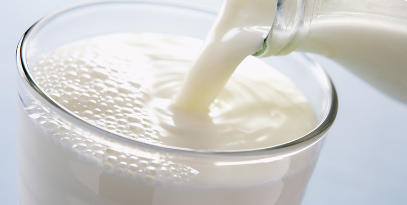

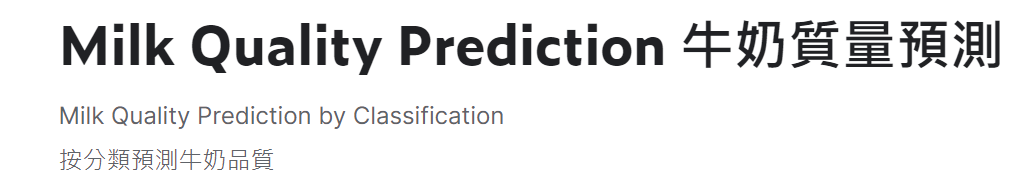

牛奶品質預測（分類）

About Dataset 關於數據集 : 此數據集是從觀測值中手動收集的。它幫助我們建立機器學習模型來預測牛奶的品質。

該數據集由 7 個自變數組成，即 pH、溫度、味道、氣味、脂肪、濁度和顏色。

一般來說，牛奶的等級或品質取決於這些參數。這些參數在牛奶的預測分析中起著至關重要的作用。

目標: 
低（壞） 
中等（中等）
高（好）

如果味道、氣味、脂肪和濁度滿足最佳條件，則它們將分配 1 或 0。

溫度和 ph 值在數據集中給出了它們的實際值。

我們必須進行數據預處理和數據增強技術，以建立統計和預測模型來預測牛奶的品質。

靈感-利用機器學習在乳製品行業的優勢。

(此數據已經過預處理，其中沒有空值，並且數據集中可能不會有不平衡)

導入庫：

import numpy as np：導入NumPy庫並給它一個簡短的別名np。NumPy是Python的一個基礎科學計算庫，提供了大量用於處理數組的函數和工具。

import pandas as pd：導入Pandas庫並給它一個別名pd。Pandas是一個數據分析庫，提供了DataFrame和Series這兩種主要的數據結構，用於處理和分析結構化數據。

import os：導入Python的標準庫os。os庫提供了豐富的方法來處理文件和目錄。

import seaborn as sns：導入Seaborn庫並給它一個別名sns。Seaborn是基於matplotlib的一個數據可視化庫，提供了一種更高級的接口來繪製吸引人的統計圖形。

import matplotlib.pyplot as plt：導入matplotlib的pyplot模塊並給它一個別名plt。pyplot是matplotlib中用於繪製圖形的一個模塊，提供了一個類似於MATLAB的繪圖框架。

import missingno as msno 是一行Python代碼，它的含義是導入了名為 missingno 的Python庫，並使用別名 msno 來引用該庫。用於處理缺失值（missing values）的Python工具包。它提供了各種方法來可視化和處理數據中的缺失值，例如繪製缺失值的熱圖、條形圖等，以幫助你更好地理解和處理缺失值的情況。通過使用這個庫，你可以更容易地檢測數據中的缺失值，並決定如何處理它們，例如填充缺失值或刪除相應的數據點。

import warnings 和 warnings.filterwarnings("ignore")：這兩行代碼用於控制Python中的警告信息。導入warnings模塊後，使用filterwarnings("ignore")函數來忽略掉所有的警告信息，使得程序的輸出更加整潔。這在處理某些可能會產生很多警告的數據分析或機器學習任務中特別有用。

這些庫是數據分析和可視化中非常常用的工具，它們各自提供了一套功能豐富的工具和方法，用於數據的加載、處理、分析和可視化。

In [1]:
# Data processing, Linear algebra
import pandas as pd
import numpy as np
import os

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\cgiks\Desktop\AI & ML\ML題目練習\Milk Quality Prediction\milknew.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


df.shape

功能: df.shape用來獲取數據框df的形狀，即其行數和列數。

返回值: 它返回一個元組（tuple），第一個元素是行數，第二個元素是列數。

示例: 如果你的數據框有100行和10列，df.shape將會返回(100, 10)。

In [3]:
df.shape

(1059, 8)

df.tail()：這個函數用於顯示DataFrame的最後幾行（默認為5行）。這是用來快速查看數據集中最近的數據點，幫助用戶了解數據的結構和最近的數據樣本。

In [4]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


df.columns：此屬性用於獲取DataFrame中的所有列名。它可以幫助用戶理解數據集中包含的特徵（即，數據的各個維度或列），這對於數據預處理和特徵選擇非常重要。

In [5]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

df.duplicated().sum()：這行代碼用於計算DataFrame中重複行的數量。

df.duplicated()生成一個布林序列，標記出所有重複的行（第一次出現的行除外）

.sum()則計算這個序列中True值的數量，即重複行的總數。這對於識別和處理數據集中的重複數據非常有用，以確保分析的準確性。

In [6]:
df.duplicated().sum()

976

檢查 NaN 值

這段代碼用於計算DataFrame中每列的空值（NaN）數量，並將這些信息匯總成一個新的DataFrame，其中列名為"Null Values"。

df.isnull()：生成一個與原DataFrame形狀相同的布林值DataFrame，其中True表示原始位置的值是空值（NaN）。

.sum()：對布林值DataFrame進行列求和操作，計算出每列的空值數量，因為在Pandas中，True被計算為1，False為0。

pd.DataFrame(..., columns=["Null Values"])：將計算結果轉換成一個DataFrame，其中列名設置為"Null Values"。

.rename_axis("Column Name")：為結果DataFrame的行索引設置名稱"Column Name"，這樣每行的名稱就對應原DataFrame的列名。

In [7]:
pd.DataFrame(df.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


這行代碼計算DataFrame中所有空值的總數。它首先使用df.isnull()創建一個布林值DataFrame來標記空值的位置，然後第一個.sum()將每列的空值數量相加，得到每列的空值總數。第二個.sum()再將這些列的總數相加，得到整個DataFrame的空值總數。

In [8]:
df.isnull().sum().sum()

0

df.info()方法用於打印DataFrame的摘要信息，包括索引的類型和範圍、每列的數據類型、非空值的數量以及記憶體使用情況。這對於初步了解數據集的結構和存儲需求非常有用，特別是在處理大型數據集時。

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


根據數據集，我們有-

列8包含1059條記錄/條目

PH 列 - 具有浮點數據類型

等級 - 物件

所有其他 in-int

我們的數據集中沒有空值。

統計資訊

df.describe() 方法提供了數據集的統計摘要。默認情況下，它只顯示數值型列的統計信息，如計數、平均值、標準差、最小值、四分位數和最大值。

通過指定 include="all" 參數，你可以要求函數提供所有列的摘要，包括數值型和類別型。對於類別型數據，它將提供計數、唯一值數量、頻率最高的值和該值出現的次數。

In [10]:
df.describe(include = "all")

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,NaN
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,NaN
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,NaN
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,NaN
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,NaN
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,NaN


這行代碼專門描述了數據集中類別型（object）列的統計摘要。

include=['O'] 參數指定僅包括類別型數據的列。'O' 是指 object 類型，即文本或混合數據類型。

.T 是轉置操作，它將DataFrame的列和行對調。這樣做可以讓統計摘要的顯示更為清晰，尤其是當類別型列比較多時。

In [11]:
df.describe(include = ['O']).T

,count,unique,top,freq
Grade,1059,3,low,429


df.nunique() 方法返回每列唯一值的數量。這對於了解數據的多樣性非常有用。對於類別型數據，唯一值的數量可以幫助你判斷某個特徵是否適合用作模型的輸入，或者是否需要進行進一步的處理，比如合併稀有類別。

對於數值型數據，唯一值的數量可以揭示特徵的分佈特性，比如某個特徵是否可能是離散的或近似於連續分佈。

In [12]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

探索性數據分析(EDA)

（EDA）**是一個關鍵步驟，它旨在通過摘要統計和視覺化來理解數據集的主要特徵。EDA幫助你發現數據中的模式、異常、檢查假設並檢驗推理，它是數據科學項目中不可或缺的一部分，為後續的數據預處理和模型建立提供依據。

這段代碼遍歷DataFrame df 的所有列，對於每一列，它打印列名，然後打印該列中所有唯一值的列表。這對於理解數據集中每個特徵的多樣性和可能的值範圍非常有幫助。具體來說，這段代碼在數據探索階段中使用，可以幫助識別以下幾點：

1.打印列名 (i): 这一步简单地显示当前正在处理的列的名称。这对于追踪正在查看的数据部分非常有帮助，尤其是在有许多列的情况下。

2.打印该列的所有唯一值 (df[i].unique()): 这一步使用 .unique() 方法来找出并显示该列中所有不同的值。对于数值型数据，这可以帮助你理解变量的范围和可能的值。对于分类数据，这有助于识别所有可能的类别。

3.打印一个空行 (print('\n')): 这一步是为了在输出中为每个列的信息之间添加空行，从而使结果更加清晰和易于阅读。

函数、定义、意义

    1.for i in df.columns:: 这是一个循环，用于遍历DataFrame中的每一列。df.columns 是一个属性，它包含DataFrame的所有列名。

    2.print(i): 这行代码打印当前正在处理的列名，即循环变量 i 的值。

    3.df[i].unique(): .unique() 方法用于获取列 df[i] 中所有唯一值的数组。这对于初步的数据探索特别有用，因为它可以快速地给出每个特征的值的多样性和可能的异常值。

    4.print('\n'): 打印一个空行，用于分隔连续的输出，使其更易于分辨各个特征的输出结果。

意义:这段代码是探索性数据分析（EDA）过程中的一个基本步骤，旨在帮助你快速了解数据集中每个特征的唯一值情况。通过了解每个特征的唯一值，你可以：

    1.识别数据质量问题：比如错误的数据输入（例如拼写错误的分类数据），或者不一致的值（例如，同一概念的不同表示）。

    2.理解特征的多样性：特别是对于分类特征，了解有多少个不同的类别存在，以及是否有些类别可能太少，可能需要特别处理（如合并小类别）。

    3.发现潜在的异常值：对于数值型特征，unique 方法可能帮助揭示异常值，比如一个年龄字段不太可能有的负值。

总之，这段代码提供了一种快速而简单的方法来初步了解和评估你的数据集的结构和内容，是数据预处理和进一步分析的基础。

In [13]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('\n')

pH
[6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4]


Temprature
[35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65]


Taste
[1 0]


Odor
[0 1]


Fat 
[1 0]


Turbidity
[0 1]


Colour
[254 253 246 255 250 247 245 240 248]


Grade
['high' 'low' 'medium']




1.打印列名 (i)：这一步简单地显示当前正在处理的列的名称。

2.计算并打印每个唯一值的出现次数 (df[i].value_counts())：对于DataFrame中的每一列，value_counts() 函数计算该列中每个唯一值出现的次数。这对于理解数据分布特别有用，尤其是对于分类数据。它显示了每个值的频率，帮助识别最常见的类别或数值，以及它们的分布是否均衡。

3.打印空行 (print('\n'))：这一步是为了在输出中每个列的信息之间添加空行，使得结果更易于阅读。

这段代码在探索性数据分析（EDA）中特别有用，因为它提供了对每个特征值分布的直观理解。对于数值型特征，虽然value_counts() 直接应用可能不如分类特征那么直接有用（因为数值型数据可能有很多唯一值），但它可以帮助识别出现频率特别高的值或潜在的离群点。

重要性与应用：

理解数据分布：通过观察每个特征的值分布，可以了解哪些值更常见，哪些较少见。对于分类数据，这有助于确定是否存在不平衡的类别，可能需要采取特定的处理方法（如重采样）来处理机器学习模型中的类别不平衡问题。

数据清理和准备：如果某些值的出现次数异常低（比如错误的数据录入），这可能是数据清理过程中需要特别关注的问题。同样，这也有助于识别错误的类别标签或拼写错误。

特征工程：了解特征的分布可以启发特征工程的方向，比如决定哪些特征应该合并、哪些特征可能需要进行独热编码、或者是否有必要将连续特征离散化。

简而言之，这段代码是EDA过程的一个重要部分，帮助数据科学家快速评估数据的质量和特征的特性，为后续的数据预处理和模型构建提供依据。

In [14]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('\n')

pH
pH
6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: count, dtype: int64


Temprature
Temprature
45    219
38    179
40    132
37     83
43     77
36     66
50     58
55     48
34     40
41     30
66     24
35     23
70     22
65     22
60     18
90     17
42      1
Name: count, dtype: int64


Taste
Taste
1    579
0    480
Name: count, dtype: int64


Odor
Odor
0    601
1    458
Name: count, dtype: int64


Fat 
Fat 
1    711
0    348
Name: count, dtype: int64


Turbidity
Turbidity
0    539
1    520
Name: count, dtype: int64


Colour
Colour
255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: count, dtype: int64


Grade
Grade
low       429
medium    374
high      256
Name: count, dtype: int64




这段代码用于对DataFrame df 中的每个特征（列）生成一个计数图（count plot），使用的是 matplotlib 和 seaborn 库。计数图是一种条形图，用于显示每个类别值的频率计数。这对于可视化分类数据的分布特别有用。

让我们逐一解析这段代码：

1.循环遍历每列: for i in df.columns: 这行代码遍历DataFrame中的每一列。

2.设置图形大小: plt.figure(figsize=(15,6)) 设置接下来要绘制的图形的大小，这里是宽15英寸和高6英寸。这确保了图表足够大，使得所有的数据点和标签都清晰可见。

3.绘制计数图: sns.countplot(x = df[i], data = df, palette = 'hls') 使用seaborn库的countplot函数来绘制每个唯一值的计数条形图。这里 x = df[i] 指定了要对哪个列绘制计数图，palette = 'hls' 指定了条形图的颜色方案。hls 是一种颜色空间，代表色相（Hue）、亮度（Lightness）、饱和度（Saturation）。

4.设置x轴标签旋转: plt.xticks(rotation = 90) 旋转x轴上的标签90度，这样做的目的是为了防止标签文本相互重叠，特别是当某个特征有很多唯一值时。

5.显示图形: plt.show() 显示图形。在循环的每一次迭代中，都会绘制并显示当前列的计数图，然后继续到下一列。

意义与应用：

这种类型的可视化对于理解数据集中每个特征的分布情况非常有帮助。通过观察每个特征的计数图，可以快速识别出数据集中的主要趋势、类别分布是否均衡以及是否存在稀有类别。

对于分类问题，如牛奶质量预测，了解不同特征的分布可以帮助确定哪些特征可能对预测模型最有用，以及如何处理不平衡的数据。

可视化是数据探索的重要工具，它可以揭示数据中可能未被注意到的模式和异常值，为后续的数据处理和特征工程提供直观的依据。

总之，这段代码是进行探索性数据分析的一个实用工具，可以帮助你更好地理解和解释你的数据集。

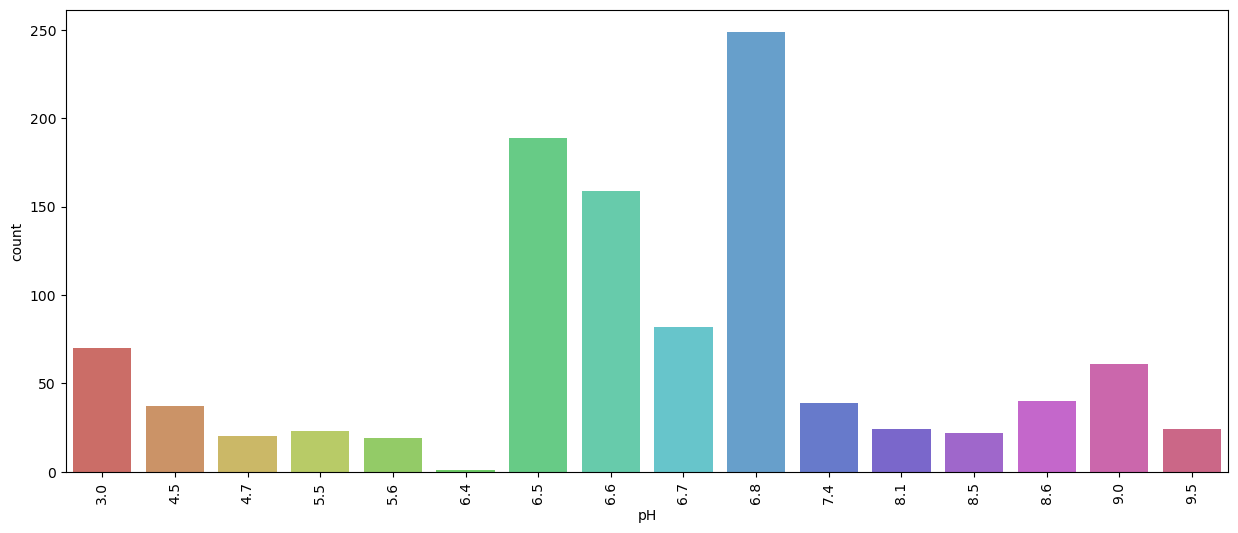

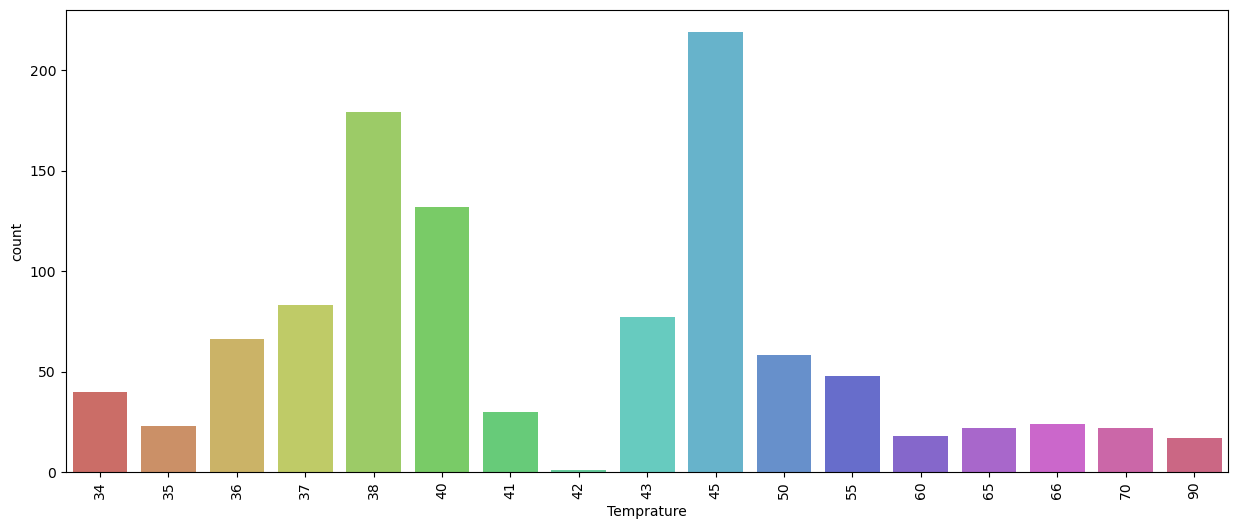

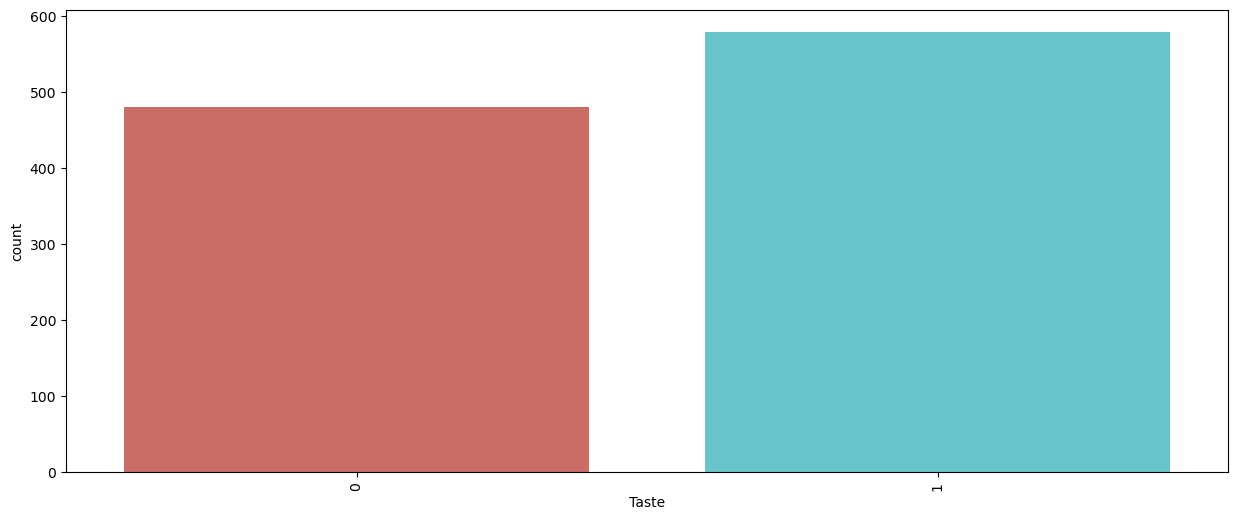

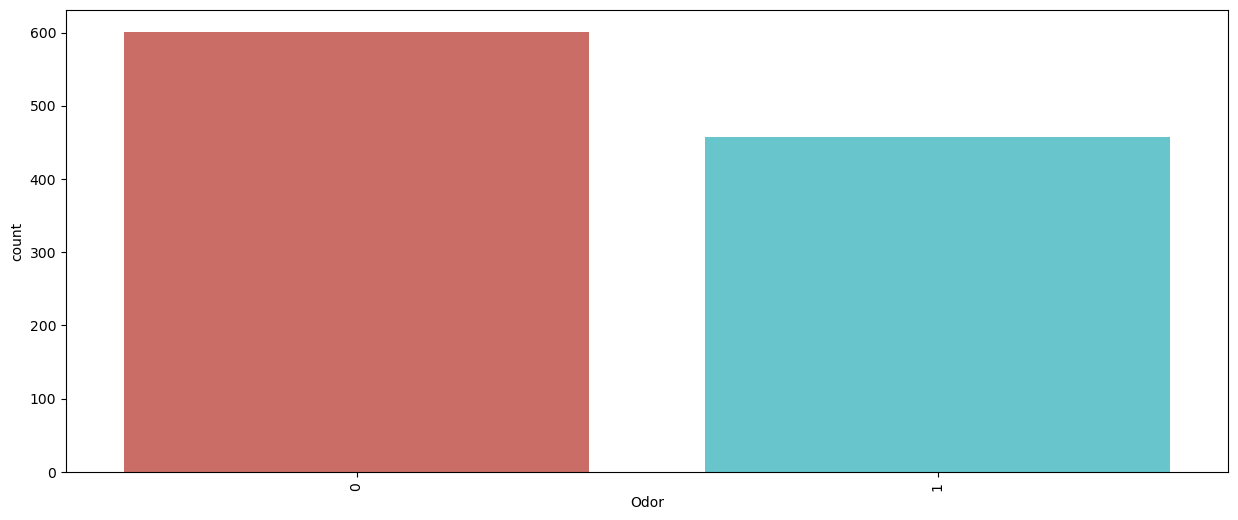

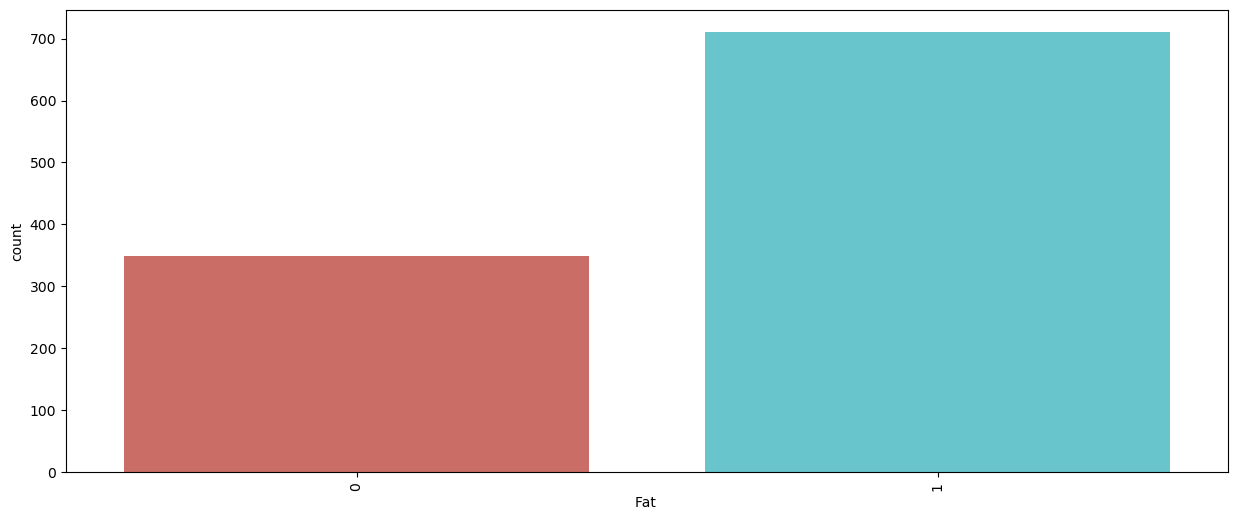

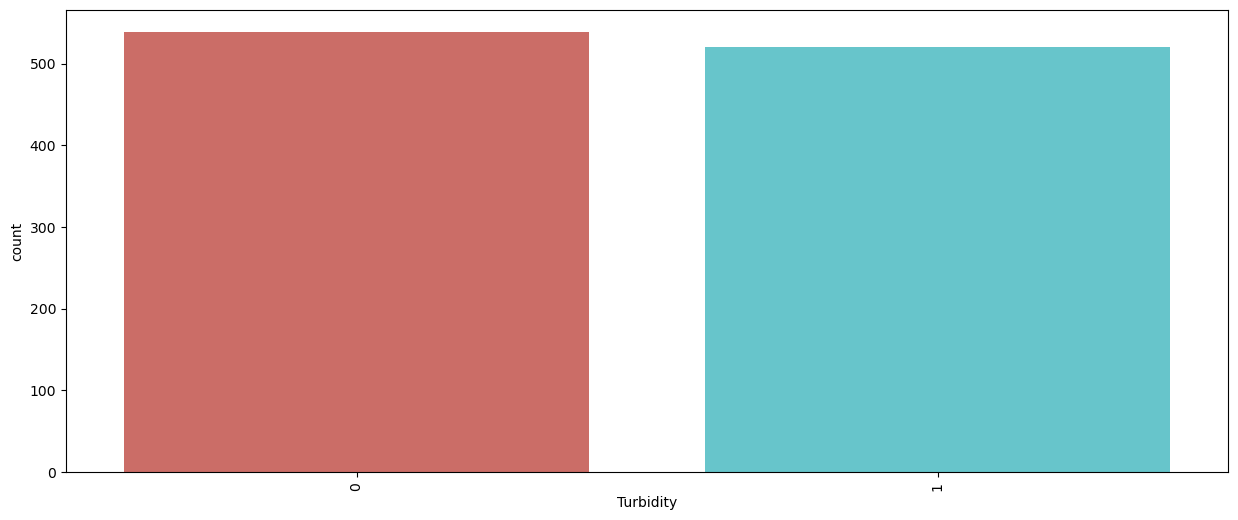

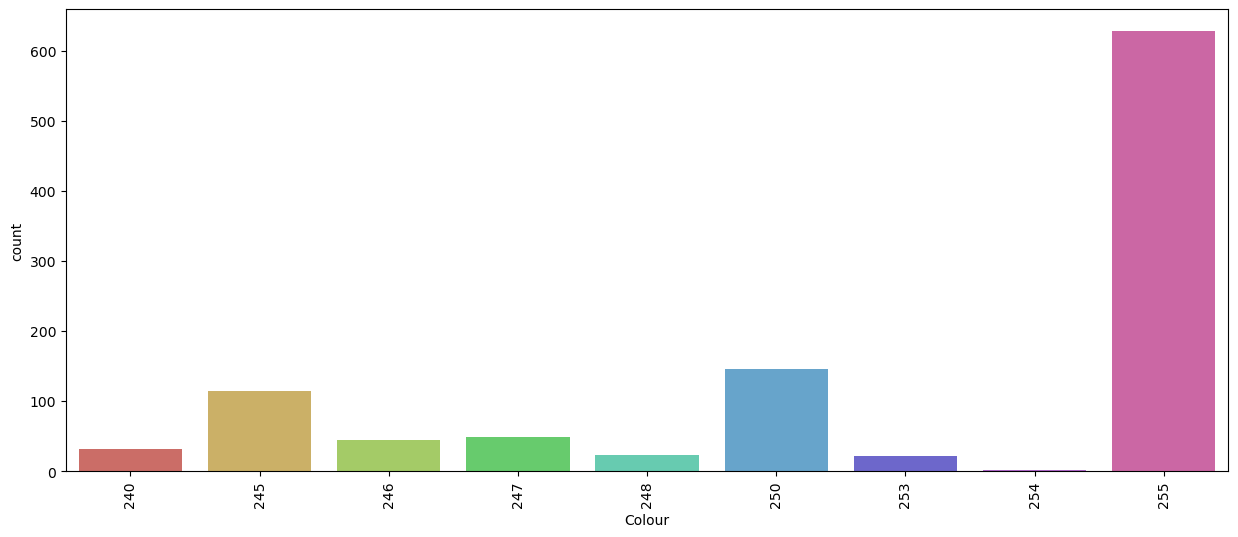

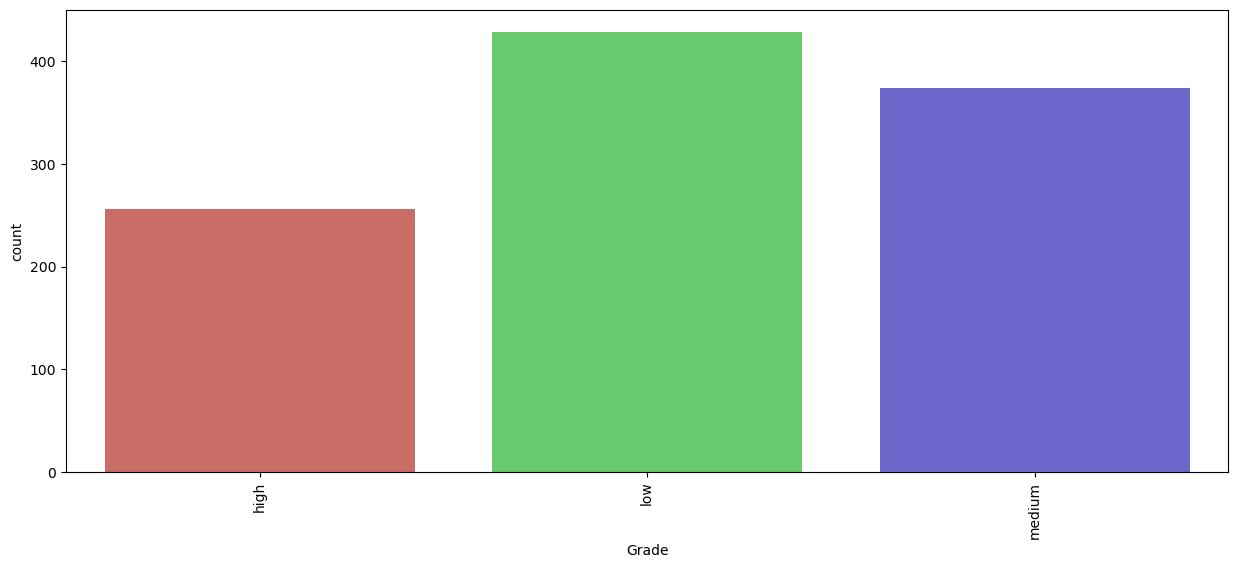

In [15]:
for i in df.columns:
  plt.figure(figsize=(15,6))
  sns.countplot( x = df[i], data = df, palette = 'hls') 
  plt.xticks(rotation = 90)
  plt.show()

这段代码旨在为DataFrame df 中的每个列生成饼图，展示每个特征的值分布。饼图是一种描述性的可视化工具，用于显示各个类别相对于总数的比例。下面是代码的详细解释：

1.循环遍历每列: for i in df.columns: 这行代码遍历DataFrame中的每一列。

2.设置图形大小: plt.figure(figsize=(30,10)) 创建一个新的图形，指定图形的大小为宽30英寸和高10英寸，确保饼图在显示时足够大，所有部分都清晰可见。

3.绘制饼图: plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%', textprops={...}) 通过matplotlib的pie函数绘制饼图。

    df[i].value_counts() 计算当前列每个唯一值出现的次数，这些次数用于确定饼图中各个扇区的大小。

    labels=df[i].value_counts().index 使用每个唯一值作为饼图中每个扇区的标签。

    autopct='%1.1f%%' 自动在饼图的扇区中添加百分比标签，保留一位小数。

    textprops={...} 定义文本属性，如字体大小、颜色、加粗和字体族。这确保饼图中的文字清晰可读，并与图形的整体美观相匹配。

4.设置标题: plt.title(i, size=20, **hfont) 设置饼图的标题为当前处理的列名 (i)，并应用定义好的字体属性 hfont，包括字体族、加粗等。size=20 指定标题的字体大小。

5.显示图形: plt.show() 显示图形。在循环的每次迭代中，都会绘制并显示当前列的饼图，然后继续到下一列。

意义与应用： 饼图非常适合展示分类数据的相对比例，帮助识别哪些类别占据主导地位，哪些可能是边缘或稀有类别。

    在牛奶质量预测的上下文中，这种可视化可以帮助理解不同质量等级的分布，或者分析其他分类变量（如口味、气味等）的分布情况。

    通过对每个特征的值分布进行可视化，可以更好地理解数据，指导后续的数据预处理和模型构建过程。例如，如果某个特征的分布极不平衡，可能需要采取技术来处理不平衡数据，或者重新考虑该特征的重要性。

这段代码是进行探索性数据分析的有用工具，通过饼图直观展示每个特征的分布情况，有助于深入理解数据集的结构和特点。

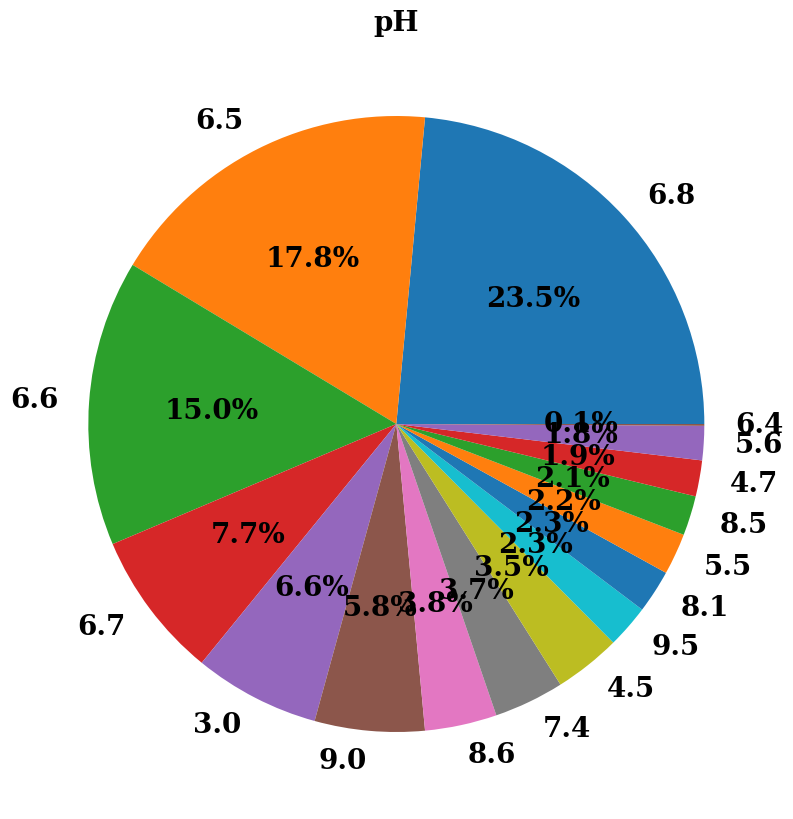

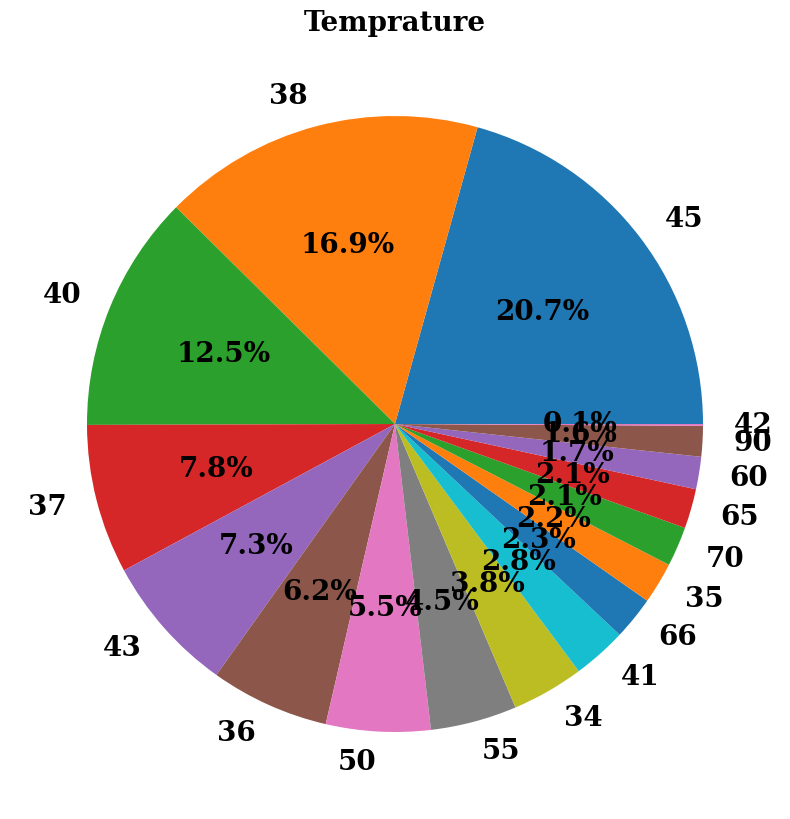

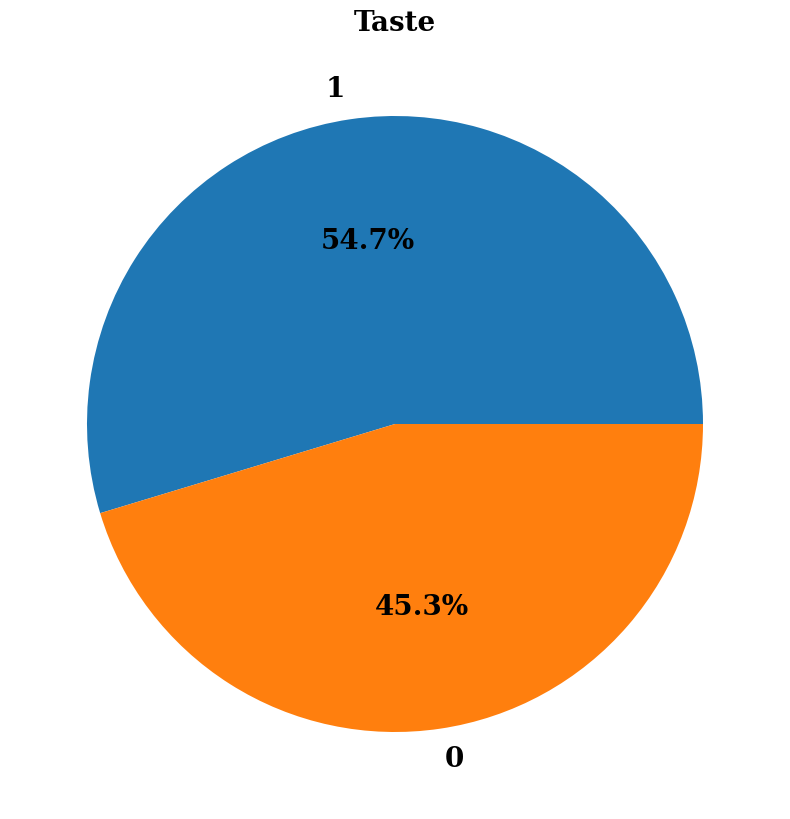

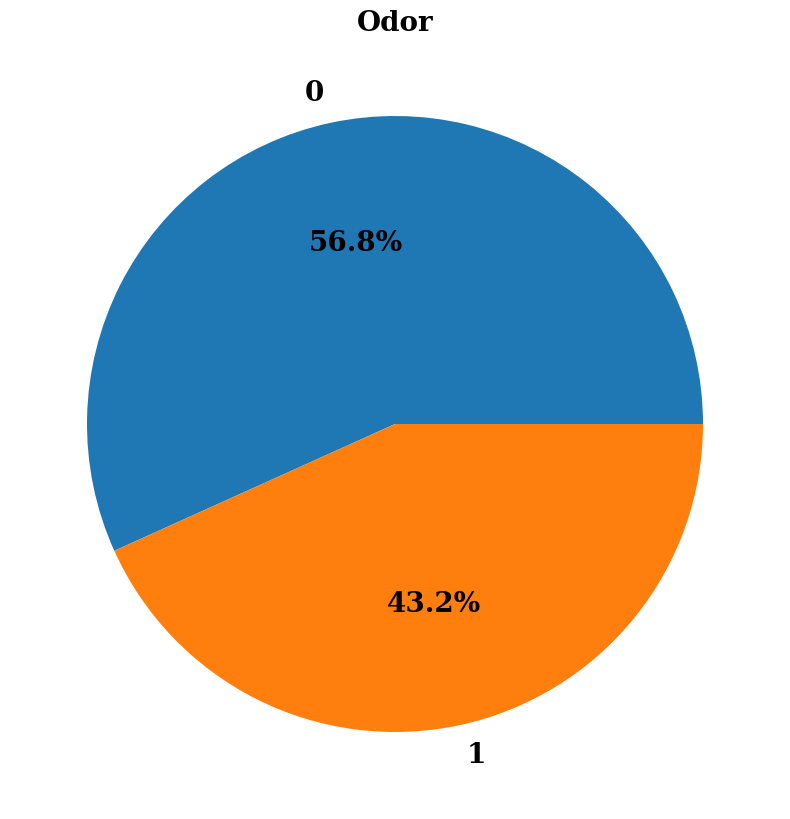

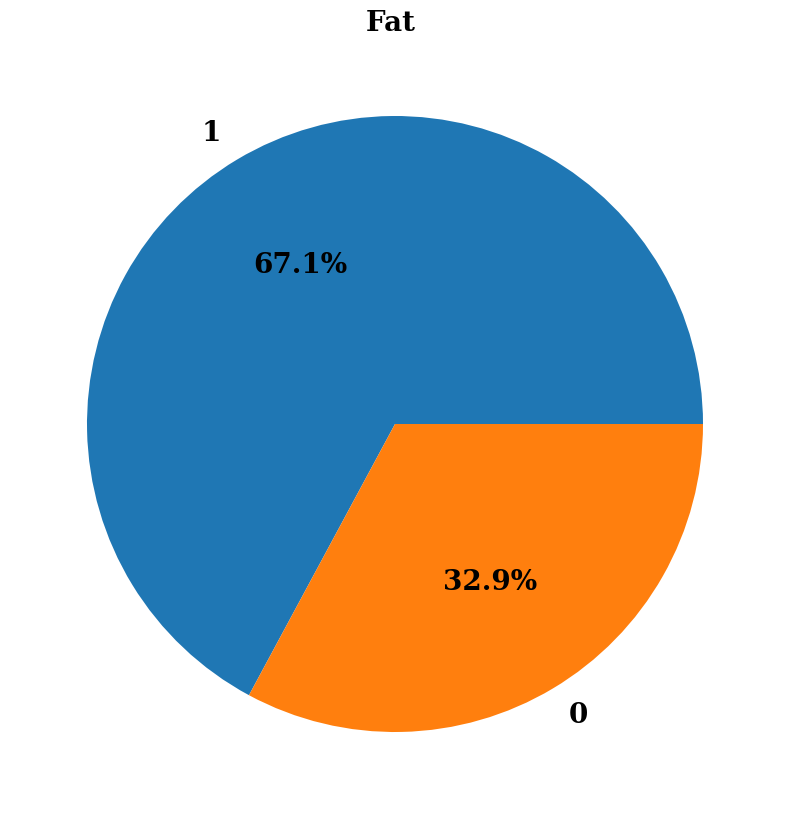

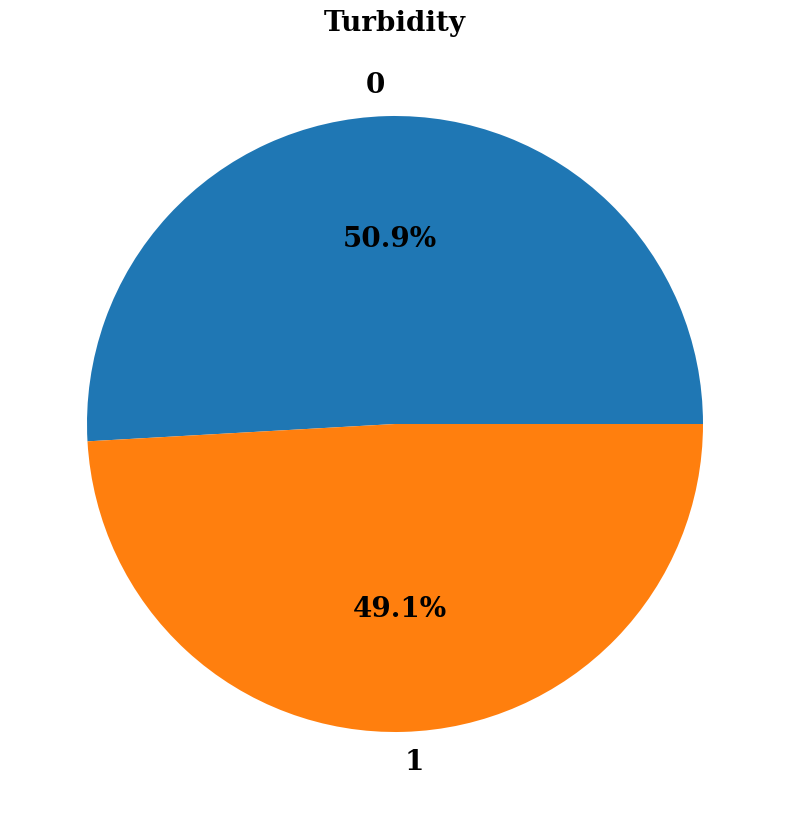

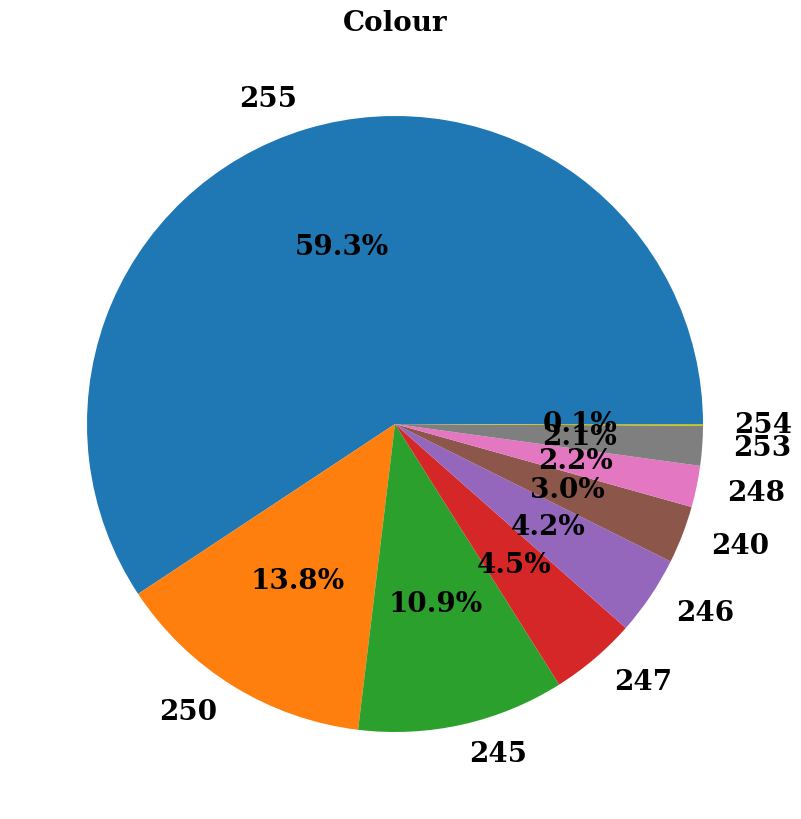

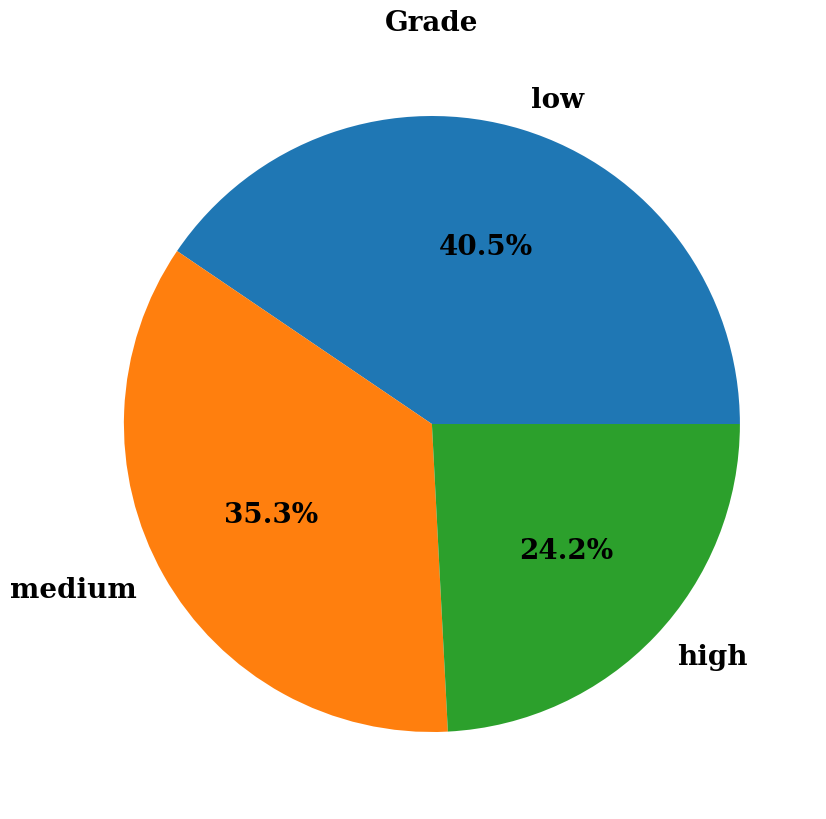

In [16]:
for i in df.columns:
  plt.figure(figsize=(30,10))
  plt.pie(df[i].value_counts(), labels=df[i].value_counts().index,
          autopct='%1.1f%%', textprops={ 'fontsize': 20,
                                        'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' })
  hfont = {'fontname':'serif', 'weight': 'bold'}
  plt.title(i, size=20, **hfont) 
  plt.show()

这段代码使用matplotlib和seaborn库来绘制DataFrame df 中每个特征的直方图，包括对数据分布的密度估计。直方图是数据可视化中常用的工具，它展示了数据的分布情况。下面逐一解释代码的各个部分：

1.循环遍历每个特征: for i in df.columns: 这行代码遍历DataFrame中的每一列（即每个特征）。

2.设置图形大小: plt.figure(figsize=(15,6)) 在绘制每个特征的直方图之前，设置图形的大小为宽15英寸、高6英寸，确保图形足够大，使得细节清晰可见。

3.绘制直方图和密度估计 sns.histplot(df[i], kde=True, bins=20, palette='hls') 使用seaborn的histplot函数绘制直方图，并开启核密度估计（kde=True）来展示数据分布的平滑曲线。bins=20指定将数据分成20个等宽的条形，这影响了直方图的粒度。
    
    palette='hls'参数在这个上下文中不适用，因为palette参数是为分类变量绘图设计的，而不是histplot；正确使用应该是在绘制分类数据的图形时指定颜色方案。

4.设置x轴标签旋转: plt.xticks(rotation=90) 旋转x轴上的标签90度，这主要是为了防止标签文本相互重叠，特别是在处理具有许多唯一值的特征时。  

5.显示图形: plt.show() 显示当前特征的直方图。在循环的每一次迭代中，都会绘制并展示当前特征的直方图，然后继续到下一特征。

函数、定义、意义

1.直方图（Histogram）：直方图是一种用于展示数据分布的图形表示，它将数据分组到连续的、不重叠的区间或"箱子"中。每个箱子的高度反映了该区间内数据点的数量。

2.核密度估计（KDE）：核密度估计是一种用于估计概率密度函数的非参数方式，可以提供关于数据分布形状的平滑估计。在直方图上添加KDE可以帮助理解数据的分布情况。

这段代码的意义在于，它为数据集中的每个特征提供了直观的分布视图，帮助识别数据的形状、偏态、峰度以及潜在的异常值。对于进行机器学习的牛奶质量预测项目，这是一个重要的步骤，因为特征的分布特性可能会影响模型的选择和性能。

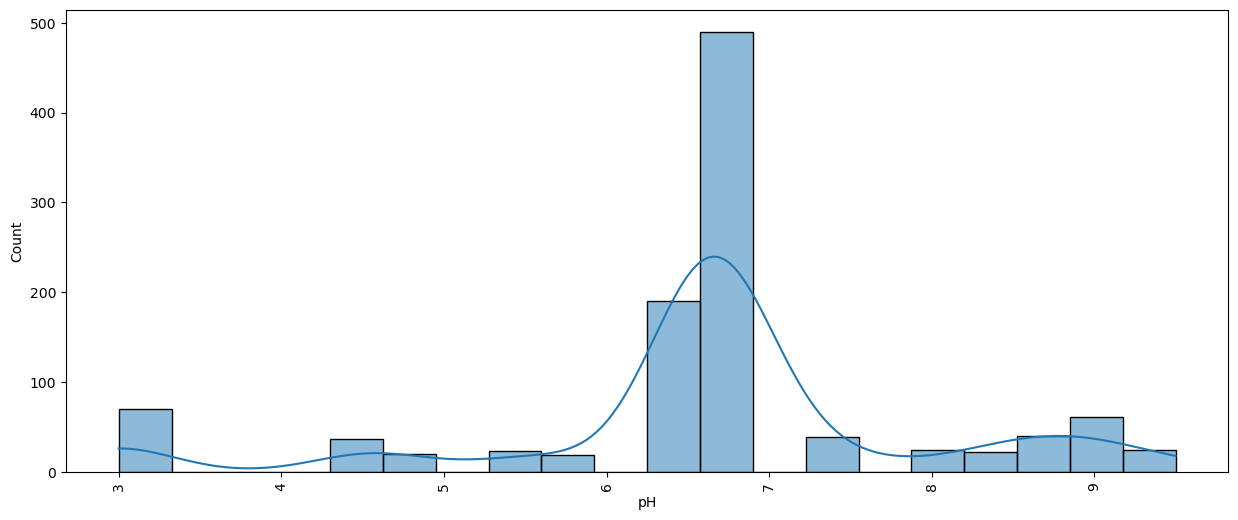

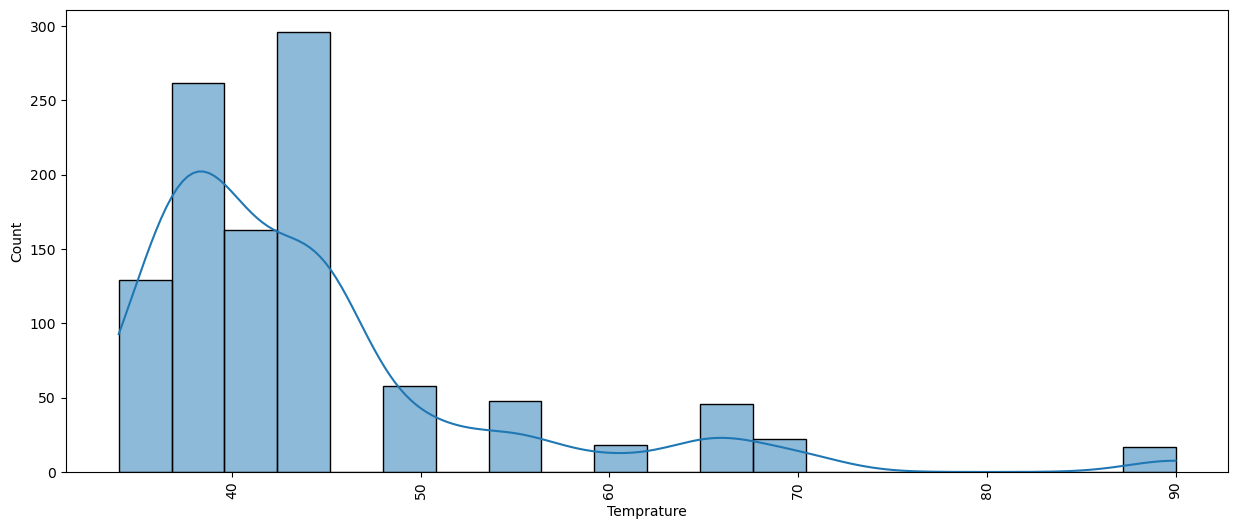

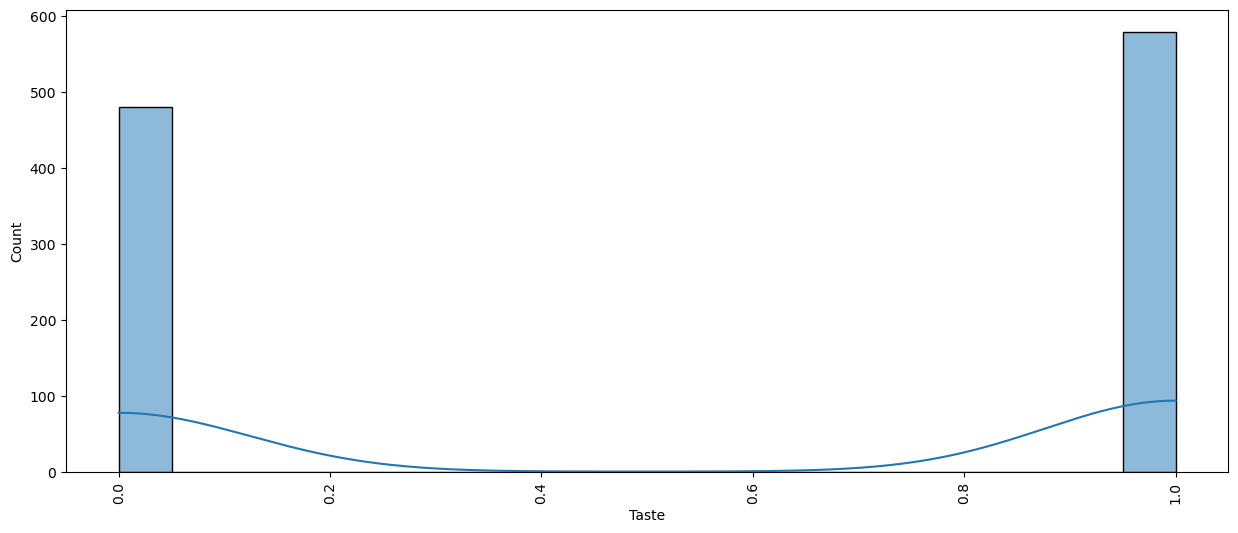

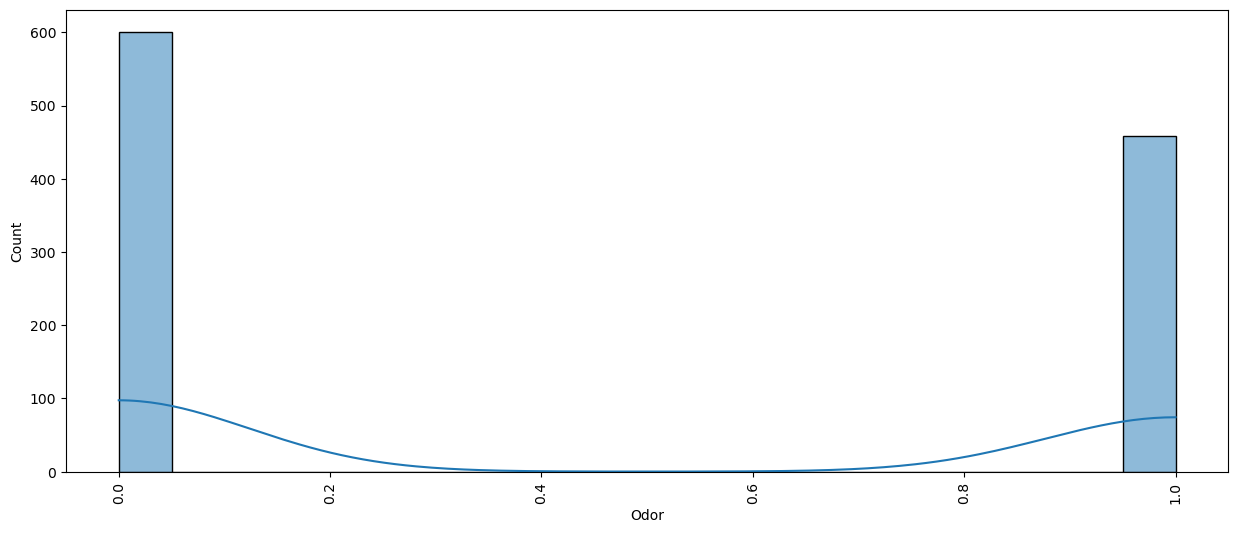

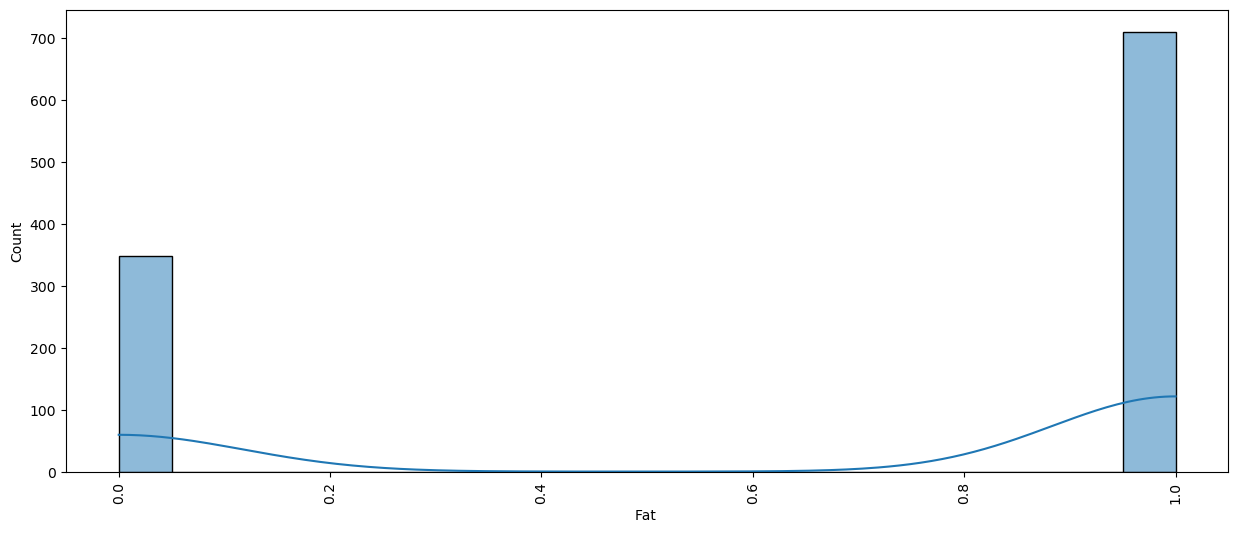

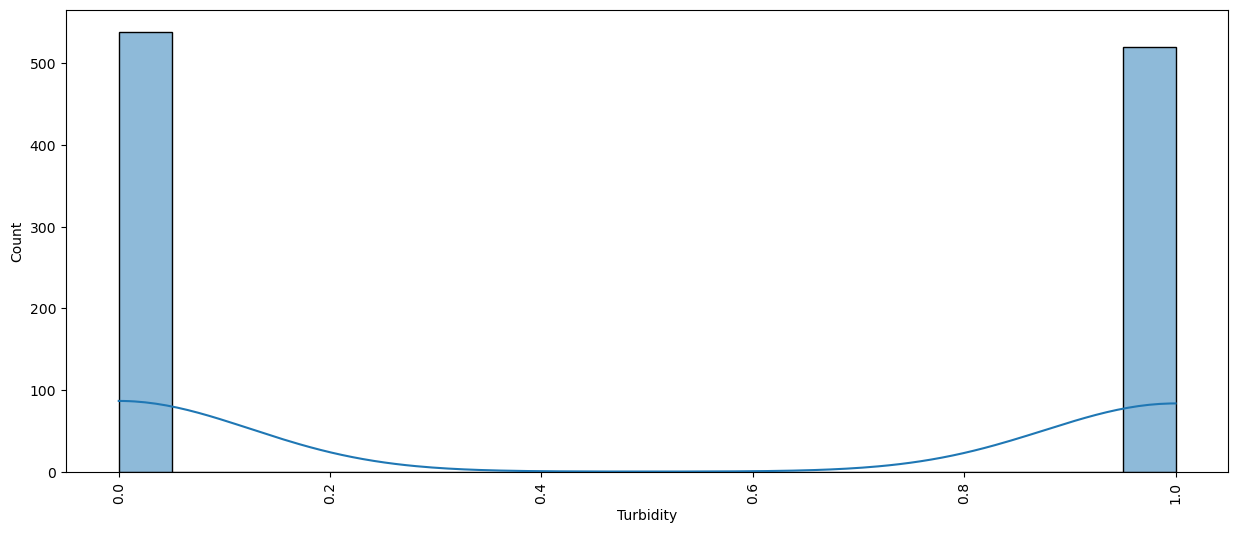

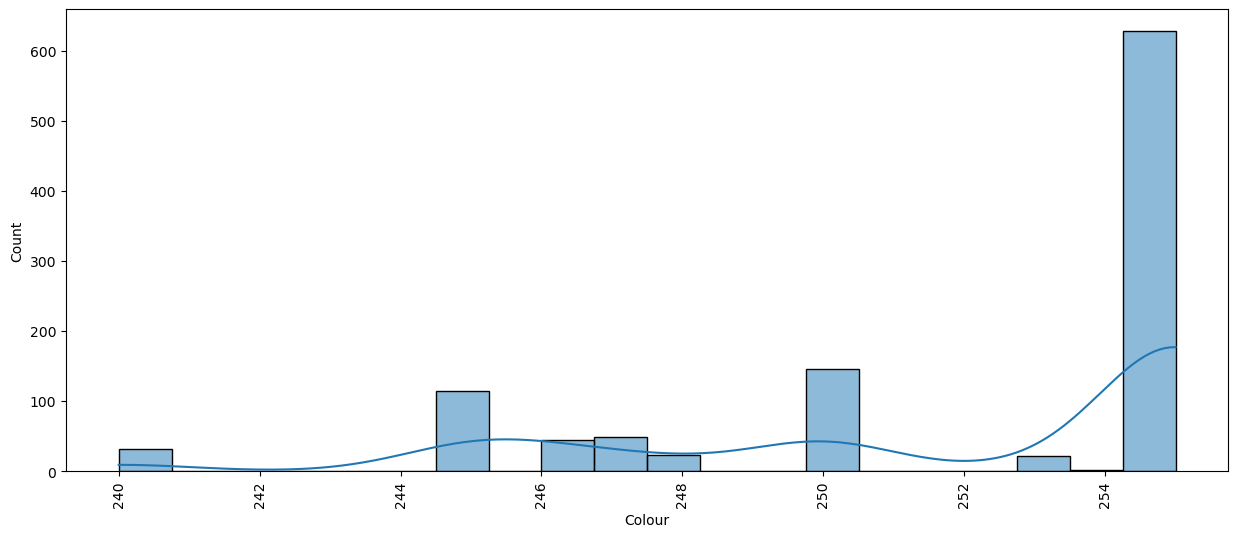

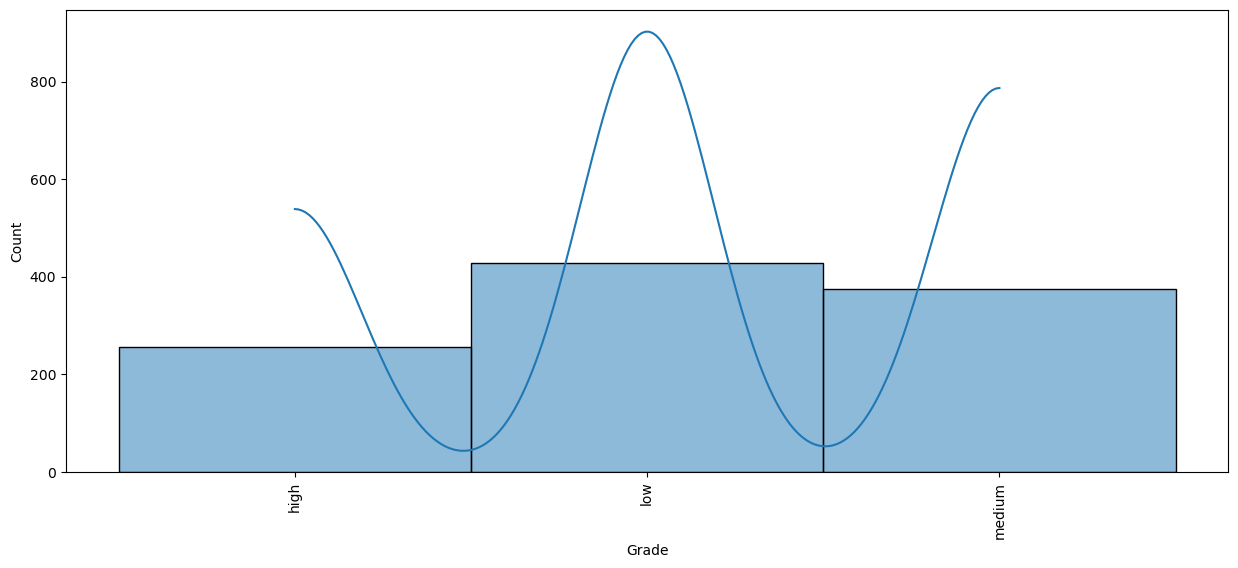

In [17]:
for i in df.columns:
  plt.figure(figsize=(15,6))
  sns.histplot(df[i], kde = True, bins = 20, palette = 'hls') 
  plt.xticks(rotation = 90)
  plt.show()

1. df['Grade'].unique()

功能：这行代码调用 .unique() 方法来获取 'Grade' 列中所有唯一的值。这对于理解分类目标变量中存在哪些类别是非常有用的。

定义：.unique() 方法返回一个数组，包含列中所有不重复的值。

意义：在牛奶质量预测的上下文中，了解所有可能的质量等级（如 'high', 'medium', 'low'）对于理解预测任务的范围和性质至关重要。这有助于确定问题是二分类、多分类还是回归问题，进而影响模型选择和评估指标的决策。

In [18]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

2. df['Grade'].value_counts()

功能：这行代码使用 .value_counts() 方法来计算 'Grade' 列中每个唯一值出现的次数。这为了解数据集中各个类别的分布提供了直接的视图。

定义：.value_counts() 方法返回一个系列，其索引为唯一值，值为每个唯一值在原始列中出现的频率。

意义：通过查看每个质量等级的计数，你可以快速识别数据集是否平衡。在分类问题中，类别不平衡可能会对模型训练产生重大影响，导致模型偏向于多数类。了解这一点可以帮助你决定是否需要采取技术来处理类别不平衡（如过采样少数类、欠采样多数类或使用特定的损失函数）。

In [19]:
df['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

箱線圖

箱線圖（Box Plot），也被稱為箱形圖或盒鬚圖，是一種用於顯示一組數據分布情況的統計圖表。箱線圖通過將數據通過四分位數（即第一四分位數（Q1）、中位數（Q2）、第三四分位數（Q3））來顯示數據的集中趨勢、散布程度和偏斜方向，同時也可以用來發現數據中的異常值。箱線圖的組成部分如下：

1.中位數（Median）：數據集中的中間值，表示在一個有序數據集中居於中間位置的數值。在箱線圖中，它通常由箱子中的一條線表示。

2.四分位數（Quartiles）：

    第一四分位數（Q1）：又稱下四分位數，它將數據集中的25%的數據分隔開來。

    第三四分位數（Q3）：又稱上四分位數，它將數據集中的75%的數據分隔開來。

    這兩個數據點構成了箱子的上下邊界，箱子的長度（IQR，即四分位距）表示數據集中間50%數據的分散程度。

3.箱子（Box）：箱子的上下邊界分別是第三四分位數和第一四分位數，箱子的長度反映了數據的變異性（越長表示變異性越大）。箱子中的橫線表示中位數。

4.鬚（Whiskers）：箱子之外的兩條線稱為鬚，它們延伸至數據集的最小值和最大值，或者延伸至1.5倍的四分位距（IQR）之外，用於表示數據集中的整體範圍。超出鬚的數據點通常被視為異常值。

5.異常值（Outliers）：在箱線圖中，超出鬚的點被認為是異常值，這些值可能由於測量錯誤、數據錄入錯誤或真實的變異導致。

箱線圖提供了一種快速識別數據集特性（如對稱性、偏斜和異常值）的方法，是數據分析和統計分析中常用的工具。

这段代码使用matplotlib和seaborn库来绘制牛奶质量等级（"Grade"）与其pH值之间关系的箱線圖。下面是代码的详细解释：

1.设置图形大小:
plt.figure(figsize=(15,6)) 创建一个新的图形，指定图形的大小为宽15英寸、高6英寸。这确保了图表足够大，使得所有细节都清晰可见。

2.绘制箱線圖:
sns.boxplot(data=df, x="Grade", y="pH") 使用seaborn的boxplot函数来绘制箱線图。这里，data=df指定数据来源是DataFrame df，x="Grade"指定x轴上的分类变量是"Grade"，y="pH"指定y轴上的数值变量是"pH"。这个箱線图展示了不同质量等级的牛奶其pH值的分布情况。

3.设置图形标题和轴标签:

    plt.title('pH vs Grade') 设置图形的标题为 "pH vs Grade"，说明这个图表展示的是牛奶的pH值与其质量等级之间的关系。
    
    plt.xlabel('Grade') 和 plt.ylabel('pH') 分别设置x轴和y轴的标签。这些标签为图表提供了更多的上下文信息，使得图表更容易被理解。

4.显示图形:
plt.show() 显示图形。在这一步之后，上述设置的图形大小、箱線图、标题和轴标签将一起展示在一个图表中。

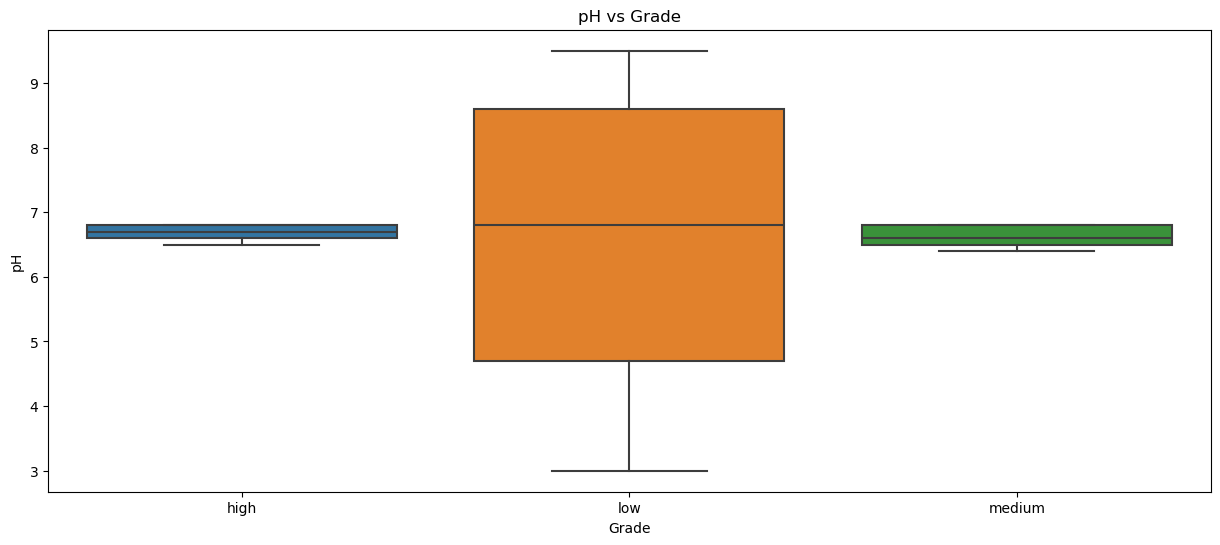

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="pH")
plt.title('pH vs Grade')
plt.xlabel('Grade')
plt.ylabel('pH')
plt.show()

这段代码使用matplotlib和seaborn库来绘制关于牛奶质量等级（"Grade"）与温度（"Temperature"，这里代码中的拼写为"Temprature"，实际应用中需确保使用正确的列名）之间关系的箱线图。以下是每个部分的详细解释：

1.设置图形大小: 
plt.figure(figsize=(15,6)) 创建一个新的图形窗口，并设置其大小为宽15英寸和高6英寸。这一步确保了图表足够大，使得所有的细节都清晰可见。

2.绘制箱线图: 
sns.boxplot(data=df, x="Grade", y="Temprature") 使用seaborn的boxplot函数来绘制箱线图。这里，data=df指定了数据来源于DataFrame df，x="Grade"将质量等级作为x轴的分类变量，而y="Temprature"将温度作为y轴的数值变量。箱线图将为每个质量等级（如"high"、"medium"、"low"）显示温度的分布情况。

3.设置图形标题和轴标签: 
plt.title('Temprature vs Grade') 设置图形的标题，说明这个图表展示的是牛奶的质量等级与其温度之间的关系。

plt.xlabel('Grade') 和 plt.ylabel('Temprature') 分别为x轴和y轴设置标签，提供图表的更多上下文信息，使图表更易于理解。

4.显示图形: 
plt.show() 最后，显示图形。这一步骤生成的图表将包含所有之前设置的属性，如图形大小、箱线图、标题和轴标签。

函数、定义、意义

1.箱线图（Box Plot）：箱线图是用于显示数据分布的统计图表，特别是反映数据的中位数、四分位数和异常值。它对于比较不同分类下的数据分布特别有用。

2.意义：在牛奶质量预测项目中，通过绘制温度与质量等级之间的箱线图，我们可以直观地看到不同质量等级的牛奶在温度方面的分布情况。这有助于我们理解温度对牛奶质量的可能影响，例如，是否存在特定温度范围与高质量或低质量牛奶相关联的趋势。这种理解对于构建准确预测模型和进行有效的特征工程至关重要。

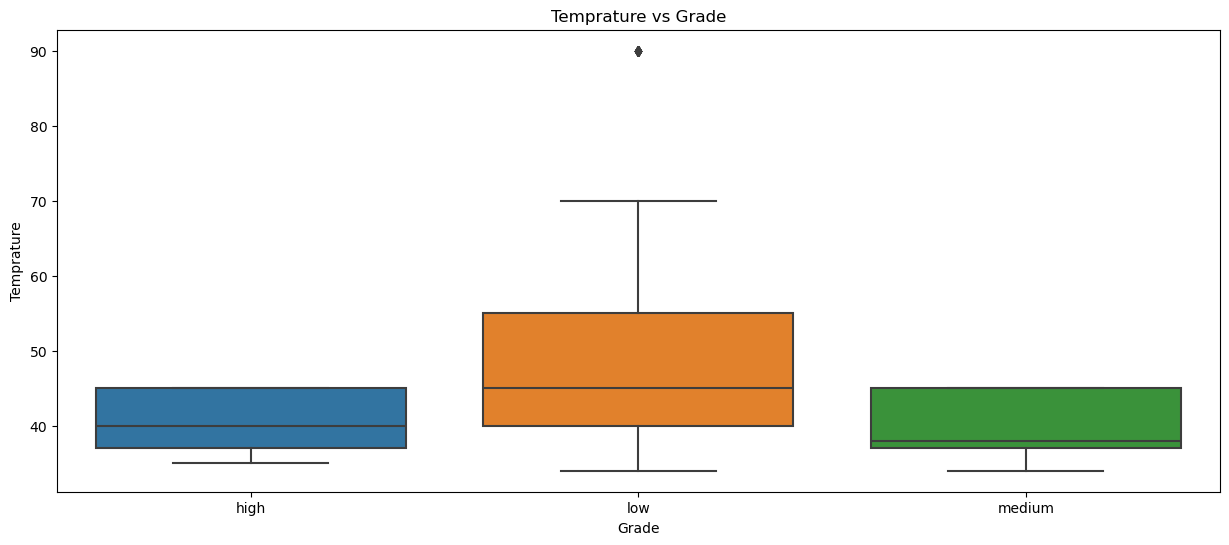

In [21]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Temprature")
plt.title('Temprature vs Grade')
plt.xlabel('Grade')
plt.ylabel('Temprature')
plt.show()

这段代码旨在使用matplotlib和seaborn库绘制一个箱线图，展示牛奶的质量等级（"Grade"）与口味（"Taste"）之间的关系。箱线图是一种用来显示数据分布情况的图形表示，它能够提供关于数据集中位数、四分位数、极值等统计信息的视觉概览。下面是代码的各个部分的详细解释：

1.设置图形大小: 
plt.figure(figsize=(15,6))：这行代码创建了一个新的图形窗口，并指定了图形的尺寸为宽15英寸和高6英寸。这样的尺寸旨在确保图形足够大，从而使得所有细节都能清晰可见。

2.绘制箱线图: 
sns.boxplot(data=df, x="Grade", y="Taste")：这行代码使用seaborn库的boxplot函数根据提供的数据绘制箱线图。参数data=df指定了数据源为DataFrame df，x="Grade"将质量等级作为X轴的分类变量，而y="Taste"则将口味评分作为Y轴的数值变量。此图将为不同的质量等级显示口味评分的分布情况。

3.添加图形标题和轴标签: 
plt.title('Taste vs Grade')：这行代码设置图形的标题，说明图表展示的是口味与质量等级之间的关系。
plt.xlabel('Grade') 和 plt.ylabel('Taste')：这两行代码分别为X轴和Y轴设置了标签，即质量等级和口味评分，这有助于图表的理解和解读。

4.显示图形: 
plt.show()：这行代码负责显示图形。所有之前的设置（包括图形大小、箱线图、标题和轴标签）都将在这一步骤中呈现。

函数、定义、意义

1.箱线图（Box Plot）：箱线图是一种常用的统计图表，用于展示数据的分布情况。通过箱线图，我们可以快速识别数据的中位数、四分位数、是否存在异常值等统计信息。

2.意义：对于牛奶质量预测项目，绘制口味与质量等级之间的箱线图有助于我们理解不同质量等级的牛奶在口味评分方面的分布情况。例如，我们可以观察到是否有特定的质量等级通常与较高或较低的口味评分相关联。这种洞察对于特征选择和模型训练过程中的决策制定非常重要，因为它可以帮助我们确定哪些特征对于预测牛奶质量最为重要。

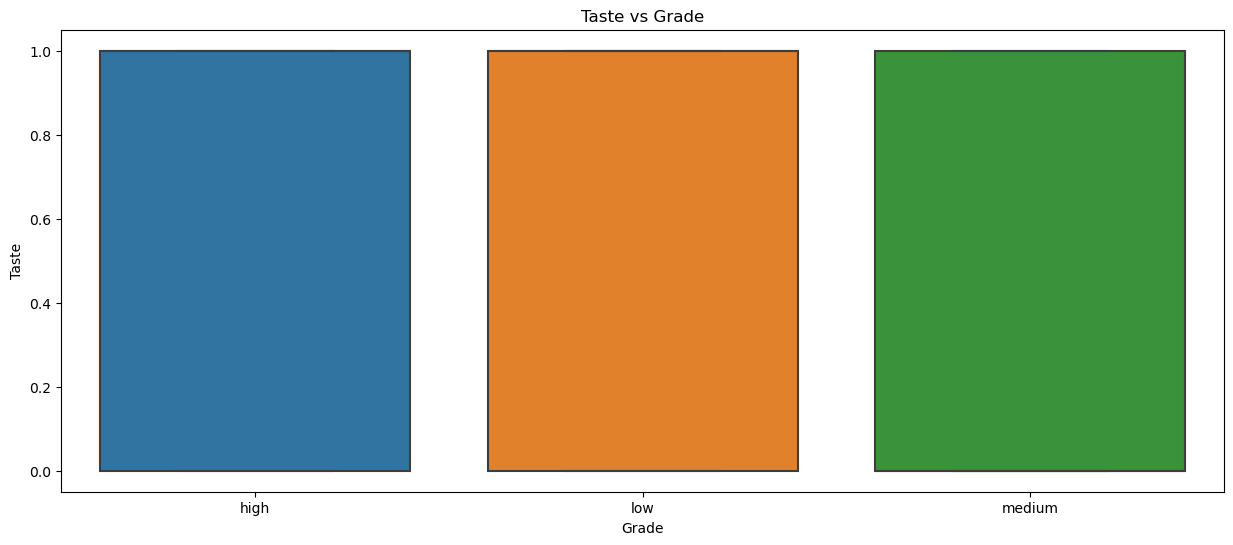

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Taste")
plt.title('Taste vs Grade')
plt.xlabel('Grade')
plt.ylabel('Taste')
plt.show()

这段代码旨在使用matplotlib和seaborn库来绘制一个箱线图，展示不同牛奶质量等级（"Grade"）下的气味（"Odor"）分布情况。箱线图是一种标准化的方式来展示数据分布的五数概括（最小值、第一四分位数（Q1）、中位数（Q2）、第三四分位数（Q3）、最大值）以及异常值。这种图形非常适合比较不同组之间的数据分布。以下是代码的具体解释：

1.设置图形大小: 
plt.figure(figsize=(15,6))：这行代码创建了一个新的图形窗口，并指定了图形的尺寸为宽15英寸、高6英寸。这样做是为了确保图表足够大，从而使得所有的细节都能清晰可见。

2.绘制箱线图: 
sns.boxplot(data=df, x="Grade", y="Odor")：这行代码使用seaborn库的boxplot函数来绘制箱线图。data=df指定了数据源为DataFrame df，x="Grade"将质量等级作为X轴的分类变量，y="Odor"将气味作为Y轴的数值变量。这个箱线图将显示不同质量等级的牛奶在气味评分上的分布情况。

3.添加图形标题和轴标签: 
plt.title('Odor vs Grade')：这行代码为图形设置了标题，即"Odor vs Grade"，表明图表展示的是气味与质量等级之间的关系。

plt.xlabel('Grade') 和 plt.ylabel('Odor')：这两行代码分别为X轴和Y轴设置了标签，标签分别为"Grade"和"Odor"，提供了图表的上下文信息，帮助理解图表所展示的内容。

4.显示图形: 
plt.show()：这行代码负责显示图形。所有之前设置的属性（包括图形大小、箱线图、标题和轴标签）都将在这一步骤中呈现出来。

函数、定义、意义

1.箱线图（Box Plot）：箱线图是用于描述数据分布特征的图形表示方法。通过箱线图，我们可以直观地看到数据的中位数、四分位数、是否存在异常值等关键统计信息，对于比较不同组别或类别之间的数据分布非常有用。

2.意义：在牛奶质量预测项目中，绘制"Odor"与"Grade"之间的箱线图有助于我们理解不同质量等级的牛奶在气味方面的差异。例如，我们可以分析是否存在某些特定的气味特征与高质量或低质量牛奶相关联。这种分析对于特征选择、数据预处理以及后续建立机器学习模型来预测牛奶质量非常重要。

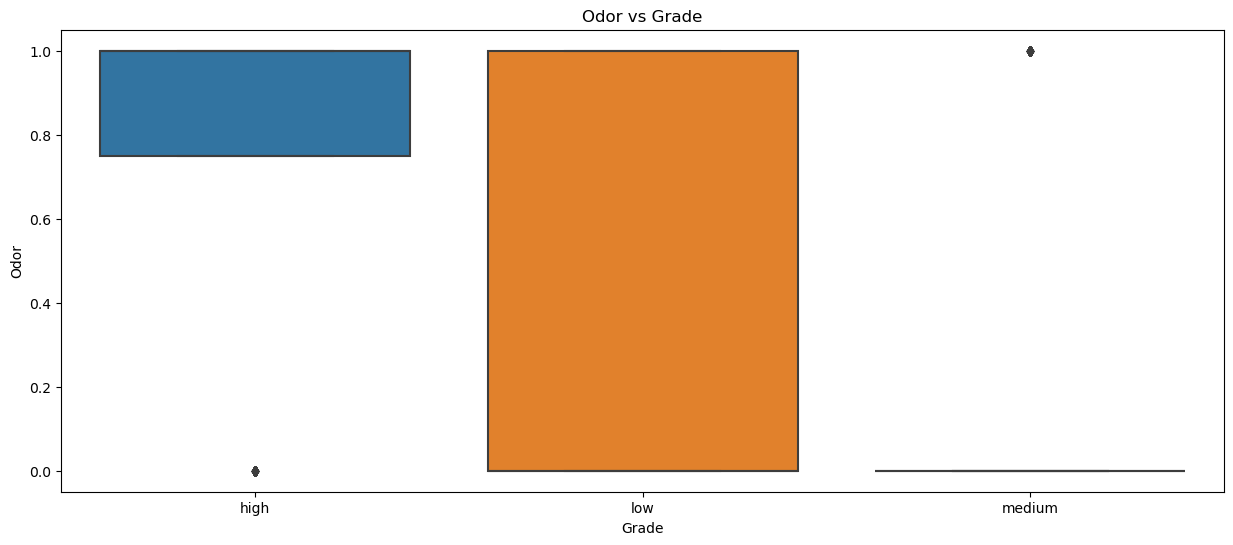

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Odor")
plt.title('Odor vs Grade')
plt.xlabel('Grade')
plt.ylabel('Odor')
plt.show()


这段代码用于绘制一个箱线图，展示不同牛奶质量等级（"Grade"）与颜色（"Colour"）之间的关系。通过matplotlib和seaborn库的结合使用，这个图形旨在提供一种直观的方式来理解牛奶的颜色如何根据其质量等级而变化。下面是对代码各部分的详细解释：

1.设置图形大小: 
plt.figure(figsize=(15,6))：创建一个新的图形窗口，并指定其大小为宽15英寸、高6英寸。这个大小设置确保了图表足够大，使得细节清晰可见，便于观察和分析。

2.绘制箱线图: 
sns.boxplot(data=df, x="Grade", y="Colour")：使用seaborn的boxplot函数根据提供的数据绘制箱线图。这里，data=df指明数据来源于DataFrame df，x="Grade"指定x轴上的分类变量为"Grade"（牛奶的质量等级），而y="Colour"指定y轴上的数值变量为"Colour"（牛奶的颜色）。这个箱线图将为每个质量等级显示颜色值的分布情况。

3.添加图形标题和轴标签: 
plt.title('Colour vs Grade')：为图形设置标题，明确图表展示的是牛奶的颜色与其质量等级之间的关系。

plt.xlabel('Grade') 和 plt.ylabel('Colour')：分别为x轴和y轴设置标签，其中x轴标签为"Grade"，y轴标签为"Colour"。这些标签为图表提供了额外的上下文信息，帮助解读图表内容。

4.显示图形: 
plt.show()：显示上述所有设置的图形。这一步骤确保了图形的呈现，包括图形大小、箱线图、标题和轴标签等。

函数、定义、意义

1.箱线图（Box Plot）：箱线图是一种统计图形，用于展示数据的分布情况，包括中位数、四分位数、异常值等。它是分析和比较不同分类数据分布的有力工具。

2.意义：在牛奶质量预测的背景下，使用箱线图来展示不同质量等级牛奶的颜色分布情况可以提供洞察力，比如是否某些颜色值与特定的质量等级相关联。这有助于理解颜色这一特征在预测牛奶质量中的重要性，为特征选择和后续的机器学习模型开发提供依据。

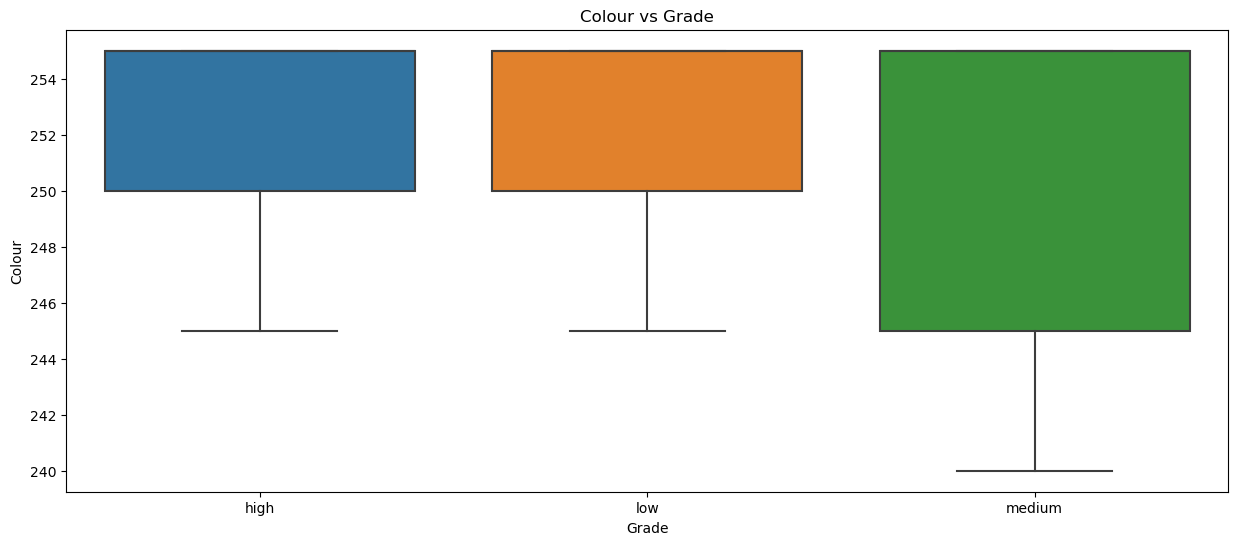

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Colour")
plt.title('Colour vs Grade')
plt.xlabel('Grade')
plt.ylabel('Colour')
plt.show()

这段代码用于绘制一个箱线图，展示不同牛奶质量等级（"Grade"）与浑浊度（"Turbidity"）之间的关系。通过使用matplotlib和seaborn库，这个图形旨在提供一种直观的方式来理解牛奶的浑浊度如何根据其质量等级而变化。下面是对代码各部分的详细解释：

1.设置图形大小: 
plt.figure(figsize=(15,6))：创建一个新的图形窗口，并指定其大小为宽15英寸、高6英寸。这个大小设置确保了图表足够大，使得细节清晰可见，便于观察和分析。

2.绘制箱线图: 
sns.boxplot(data=df, x="Grade", y="Turbidity")：使用seaborn的boxplot函数来绘制箱线图。这里，data=df指明数据来源于DataFrame df，x="Grade"指定x轴上的分类变量为"Grade"（牛奶的质量等级），而y="Turbidity"指定y轴上的数值变量为"Turbidity"（牛奶的浑浊度）。这个箱线图将为每个质量等级显示浑浊度值的分布情况。

3.添加图形标题和轴标签: 
plt.title('Turbidity vs Grade')：为图形设置标题，明确图表展示的是牛奶的浑浊度与其质量等级之间的关系。

plt.xlabel('Grade') 和 plt.ylabel('Turbidity')：分别为x轴和y轴设置标签，其中x轴标签为"Grade"，y轴标签为"Turbidity"。这些标签为图表提供了额外的上下文信息，帮助解读图表内容。

4.显示图形: 
plt.show()：显示上述所有设置的图形。这一步骤确保了图形的呈现，包括图形大小、箱线图、标题和轴标签等。

函数、定义、意义

1.箱线图（Box Plot）：箱线图是一种统计图形，用于展示数据的分布情况，包括中位数、四分位数、异常值等。它是分析和比较不同分类数据分布的有力工具。

2.意义：在牛奶质量预测的背景下，使用箱线图来展示不同质量等级牛奶的浑浊度分布情况可以提供洞察力，比如是否某些浑浊度水平与特定的质量等级相关联。这有助于理解浑浊度这一特征在预测牛奶质量中的重要性，为特征选择和后续的机器学习模型开发提供依据。

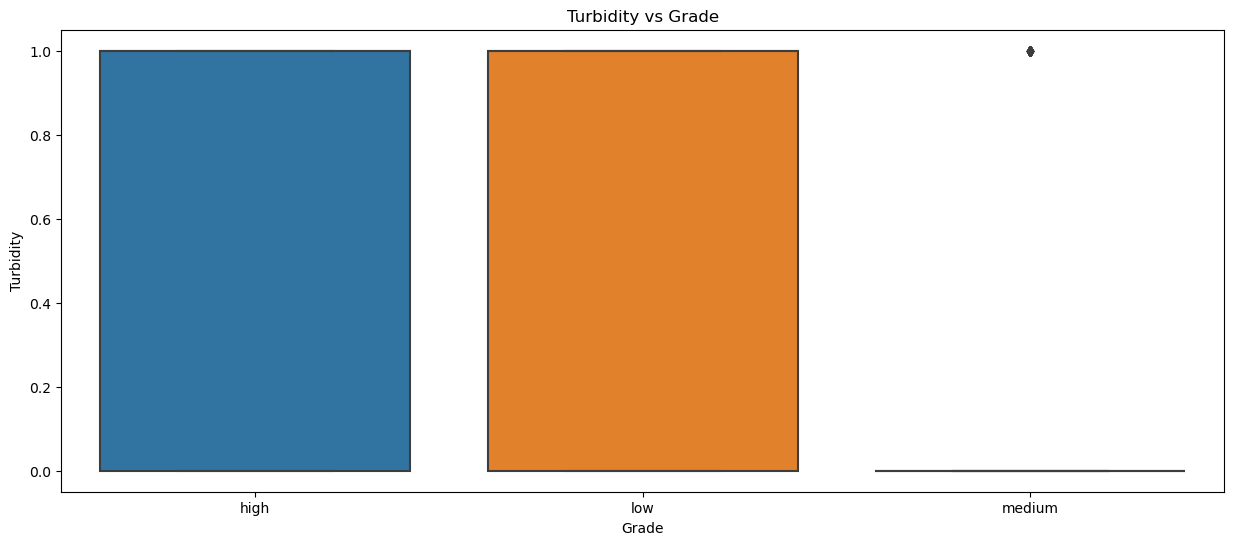

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x="Grade", y="Turbidity")
plt.title('Turbidity vs Grade')
plt.xlabel('Grade')
plt.ylabel('Turbidity')
plt.show()

可視化功能之間的關係

这段代码使用matplotlib和seaborn库来绘制一个条形图（bar plot），展示了根据牛奶的质量等级（"Grade"）分类的，气味（"Odor"）与口味（"Taste"）之间的关系。条形图是数据可视化中常用的一种图表类型，它通过条形的长度来表示数值的大小，非常适合比较不同类别或组之间的数值。以下是代码的具体解释：

1.设置图形大小: 
plt.figure(figsize=(15,6))：这行代码设置了绘图窗口的大小，宽度为15英寸，高度为6英寸。这样的尺寸可以确保图表足够大，使得图表的所有细节都清晰可见。

2.绘制条形图: 
sns.barplot(x='Odor', y='Taste', hue='Grade', data=df)：使用seaborn的barplot函数来绘制条形图。这里：

    x='Odor'指定x轴的数据为"Odor"列，表示将根据不同的气味值来分组和展示数据。

    y='Taste'指定y轴的数据为"Taste"列，表示每个气味分组的口味评分的平均值（或其他统计量，如中位数，取决于barplot的默认设置或者指定的聚合函数）将通过条形的长度表示。

    hue='Grade'参数使得每个气味分组内进一步按照质量等级进行子分类，并且每个子分类用不同颜色的条形表示。

    data=df指定了数据来源是DataFrame df。

3.显示图形: 
plt.show()：这行代码显示图形。所有之前设置的属性，包括图形大小和条形图的细节，都将在这一步中呈现出来。

函数、定义、意义

1.条形图（Bar Plot）：条形图是用于展示各类别数据数值的一种图表类型，它通过条形的高度（或长度，取决于条形是垂直还是水平的）来表示数值大小。条形图非常适合于比较不同组或类别之间的数值。

2.意义：在牛奶质量预测的背景下，此条形图可以帮助我们理解不同气味等级下，牛奶口味评分如何随质量等级变化。这种可视化方式可以揭示气味和口味之间的潜在关系，以及它们是如何与牛奶的质量等级相关联的。比如，我们可能会发现某些特定的气味等级与高质量牛奶的高口味评分密切相关。这种见解对于特征工程和选择适当的机器学习模型策略来预测牛奶质量非常重要。

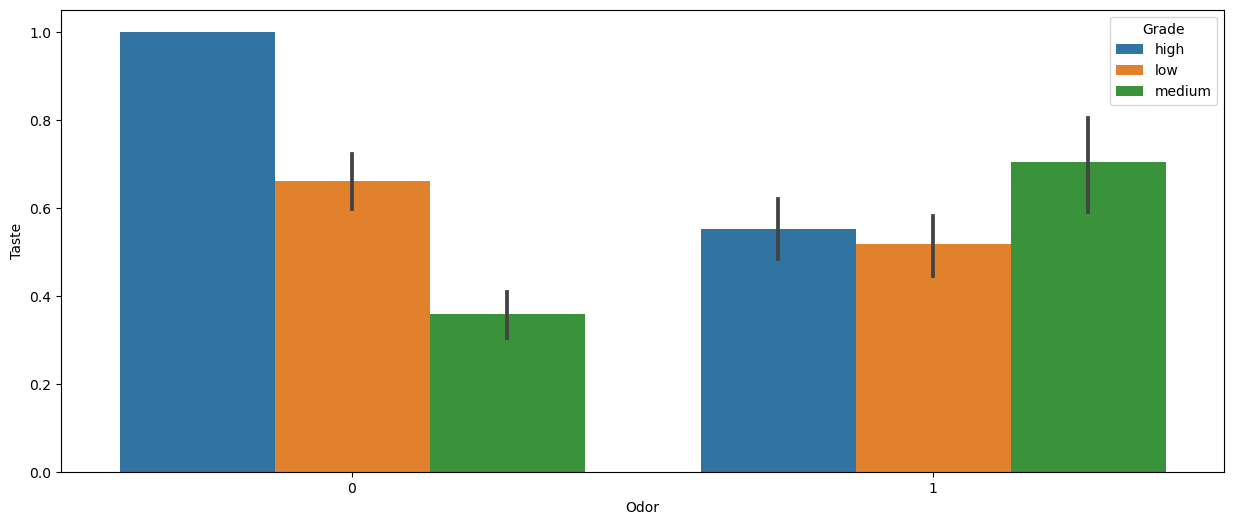

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=df)
plt.show()

这段代码利用matplotlib和seaborn库绘制一个散点图，展示了牛奶的浑浊度（"Turbidity"）与pH值之间的关系，并通过颜色（由"Grade"指定）来表示不同的牛奶质量等级。散点图是一种用于展示两个连续变量之间关系的图形，每个点的位置由这两个变量的值决定。下面是对代码各部分的详细解释：

1.设置图形大小: 
plt.figure(figsize=(15,6))：这行代码创建了一个新的图形窗口，并指定了图形的尺寸为宽15英寸、高6英寸。这样的尺寸设置确保了图表足够大，从而使得所有细节都清晰可见。

2.绘制散点图: 
sns.scatterplot(x='Turbidity', y='pH', hue='Grade', data=df)：使用seaborn的scatterplot函数来绘制散点图。这里：

    x='Turbidity'指定x轴的数据为"Turbidity"列，表示每个数据点的x位置由牛奶的浑浊度决定。

    y='pH'指定y轴的数据为"pH"列，表示每个数据点的y位置由牛奶的pH值决定。

    hue='Grade'参数使得数据点的颜色由牛奶的质量等级决定，这样不同等级的牛奶将以不同颜色表示，便于区分。

    data=df指定了数据来源是DataFrame df。

3.添加图形标题: 
plt.title('Turbidity vs pH')：为图形设置了标题"Turbitidy vs pH"，明确指出图表展示的是牛奶的浑浊度与pH值之间的关系。

4.显示图形: 
plt.show()：显示上述所有设置的图形。这一步骤确保了图形的呈现，包括图形大小、散点图、标题等。

函数、定义、意义

1.散点图（Scatter Plot）：散点图是一种用于展示两个变量之间关系的图形，适用于连续数据。通过散点图，我们可以快速识别变量之间是否存在某种关联或模式。

2.意义：在牛奶质量预测项目中，绘制浑浊度与pH值之间的散点图有助于我们理解这两个变量是否存在某种关系，以及不同质量等级的牛奶是否在这两个变量上展示出不同的分布特征。例如，我们可能会发现高质量牛奶在浑浊度与pH值的组合上呈现出特定的模式，这对于构建预测模型时的特征选择和分析非常重要。

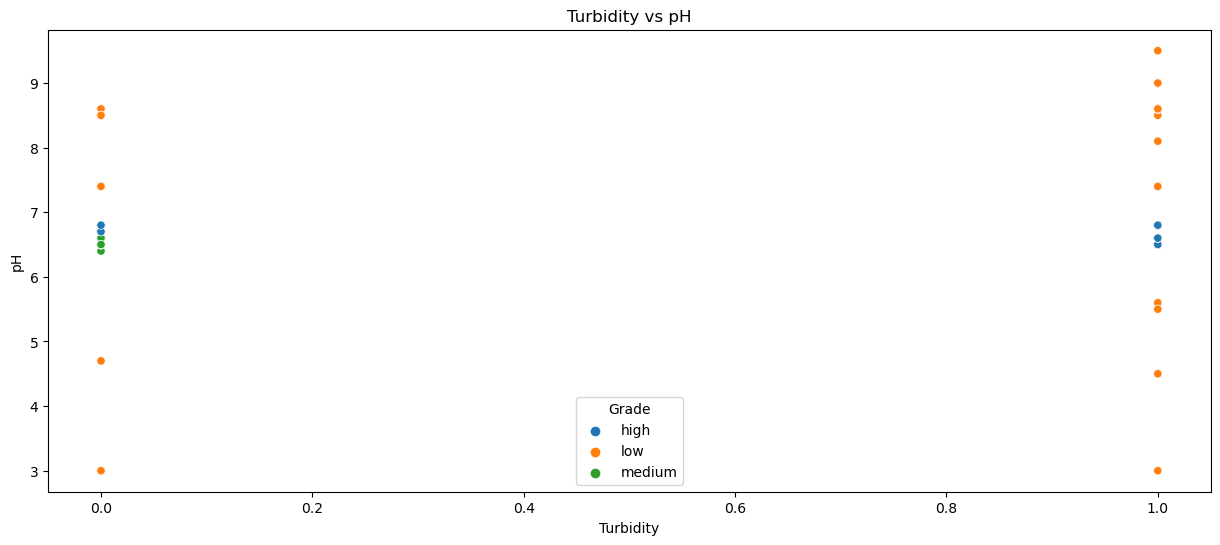

In [27]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=df)
plt.title('Turbidity vs pH')
plt.show()

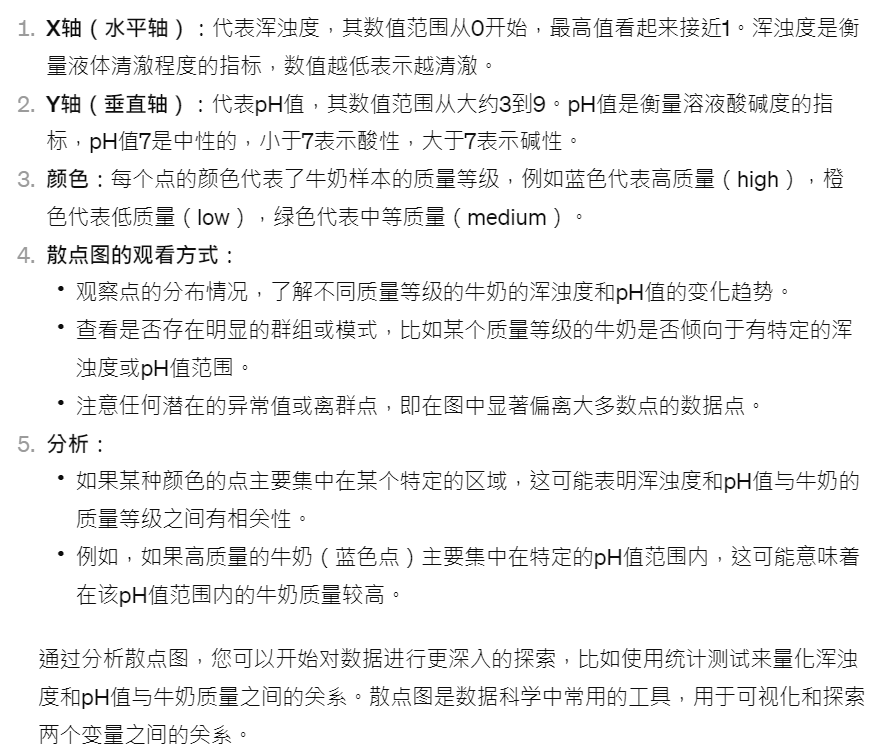

相關性:是一種統計度量，表示兩個變數線性相關的程度（這意味著它們以恆定速率一起變化）。它是一種常用工具，用於描述簡單的關係，而無需對因果關係進行陳述。

In [28]:
#df_numeric = df.select_dtypes(include=[np.number])：
    #这行代码从原始的DataFrame df 中选择了所有数值型的列，创建了一个新的DataFrame df_numeric。
    #select_dtypes(include=[np.number]) 是一个Pandas DataFrame的方法，它允许你根据列的数据类型来选择列。在这里，它被用来选择所有数据类型为数值型的列（如整数或浮点数）。
    #这是一个数据预处理步骤，以确保后续分析只涉及数值型数据
df_numeric = df.select_dtypes(include=[np.number])  # 仅选择数值型数据

#df_corr = df_numeric.corr()：
    #这行代码计算df_numeric中所有列的相关系数矩阵并将其存储在新的DataFrame df_corr中。
    #.corr() 方法默认计算皮尔逊相关系数，这是衡量两个连续变量之间线性相关程度的统计指标。
    #皮尔逊相关系数的值介于-1和1之间，其中1表示完全正相关，-1表示完全负相关，0表示没有线性相关性。
df_corr = df_numeric.corr()  # 现在可以计算相关系数了

#df_corr：
    #这行代码的目的是显示df_corr DataFrame的内容。在一个交互式环境（如Jupyter notebook）中，这将输出相关系数矩阵的表格形式。
    #相关系数矩阵中的每个元素都表示对应列之间的相关系数，例如，df_corr['pH']['Turbidity'] 会给出pH值与浑浊度之间的相关系数。
df_corr

#特征选择：选择与目标变量高度相关的特征，同时避免选择彼此高度相关的特征，因为这可能会导致多重共线性问题。
#数据理解：了解哪些变量之间有强烈的关系，这有助于构建对问题的直觉理解。
#模型构建：基于相关性分析的结果，您可以设计更好的特征工程策略和选择合适的机器学习模型。

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


这段代码是用来生成相关性热力图的，它是数据分析中用来可视化特征间相关性强度的常用工具。下面是对代码中每个部分的详细解释：

### 设置图形大小
- `plt.figure(figsize=(10, 8))`：设置图表的尺寸为宽度10英寸、高度8英寸，确保图表足够大，以便清晰展示所有的数据。

### 绘制热力图
- `plt.imshow(df_corr, cmap='rocket', interpolation='none')`：使用`matplotlib.pyplot`的`imshow`函数来绘制一个图像（在这种情况下是热力图）。`df_corr`是一个相关性矩阵DataFrame，`cmap='rocket'`设置了颜色映射，`interpolation='none'`确保在热力图的单元格之间不进行插值，以显示清晰的边界。

### 添加颜色条
- `plt.colorbar()`：添加颜色条（也称为颜色梯度条或色标），为热力图提供颜色与数值之间的对应关系。

### 添加标题和轴标签
- `plt.title('Correlation Heatmap')`：添加标题“Correlation Heatmap”。
- `plt.xticks(...)` 和 `plt.yticks(...)`：设置x轴和y轴的刻度位置，使其与`df_corr`的列和索引对应，并将列名旋转90度以防止文本重叠。

### 添加注释
- `for i in range(len(df_corr.columns)): ...`：这个循环遍历相关性矩阵的行和列，`plt.text(...)`在热力图的每个单元格中添加文本。`np.around(..., decimals=2)`用于将相关性值四舍五入到两位小数，`ha="center", va="center", color="w"`设置文本水平和垂直居中对齐，且文本颜色为白色。

### 显示图形
- `plt.show()`：最后这行代码显示了绘制好的图形。

### 函数、定义、意义
- **相关性热力图（Correlation Heatmap）**：热力图是一种以颜色变化来展示数据矩阵中值大小的技术，特别适合于展示特征间的相关性。
- **意义**：在机器学习中，理解特征间的相关性对于构建模型非常重要。强相关的特征可能会影响模型的性能，而热力图可以帮助识别这些特征。例如，在特征工程阶段，我们可能会选择去除或合并高度相关的特征，以减少数据维度和避免多重共线性。

通过这种可视化方式，数据科学家可以更直观地理解数据，发现特征间的潜在关系，从而做出更加明智的决策。

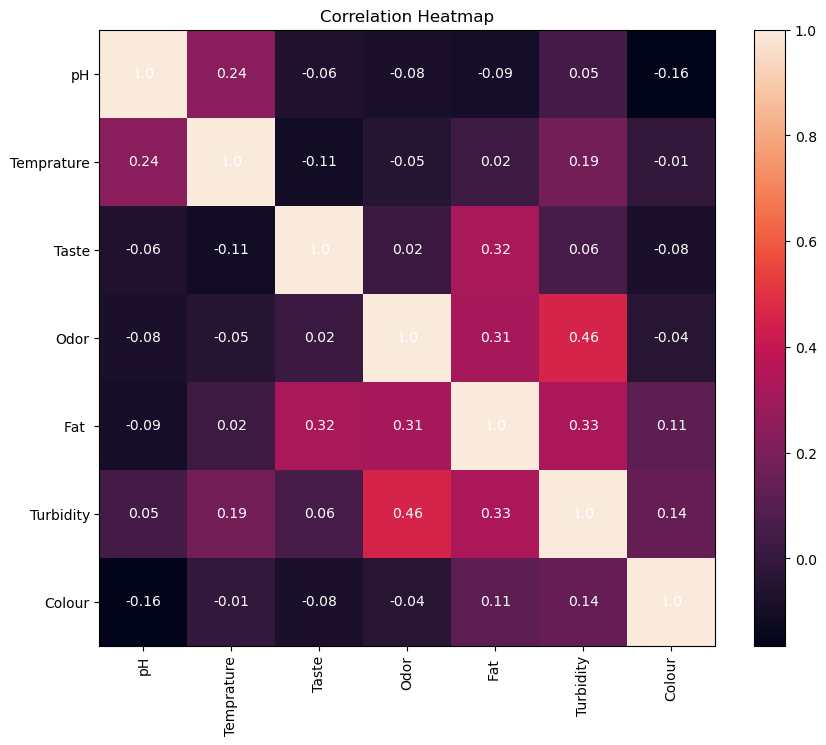

In [29]:
plt.figure(figsize=(10, 8))

# 使用imshow函数绘制热力图
plt.imshow(df_corr, cmap='rocket', interpolation='none')

# 添加颜色条
plt.colorbar()

# 添加标题和轴标签
plt.title('Correlation Heatmap')
plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr.index)), df_corr.index)

# 添加每个单元格的相关性数值注释
for i in range(len(df_corr.columns)):
    for j in range(len(df_corr.index)):
        text = plt.text(j, i, np.around(df_corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="w")

plt.show()

热力图用于可视化多个变量之间的相关性强度。在这张图上，每个小方块的颜色深浅表示变量间相关系数的大小，颜色越深（接近1或-1）表示相关性越强，颜色越浅（接近0）表示相关性越弱。正值（接近1）表示正相关，负值（接近-1）表示负相关。以下是如何观察和理解这张图：

1. **颜色映射**：颜色条（Colorbar）显示了颜色与相关系数之间的对应关系。在这张图中，棕色到粉色的变化代表相关系数从-1到1的变化。

2. **对角线**：图中的对角线表示每个变量与自身的相关性，因此总是1（完全正相关）。

3. **读取相关性值**：每个小方块内的数字是两个变量之间的相关系数。例如，pH和Temperature之间的相关系数是0.24，意味着它们之间存在中等程度的正相关性。

4. **分析变量间的关系**：
   - 寻找颜色最深或最浅的小方块来识别变量间的强相关性或弱相关性。
   - 比如，如果Taste和Fat的相关系数是0.32，这表明它们之间存在一定程度的正相关性。相比之下，pH和Colour的相关系数是-0.16，表明它们之间存在轻微的负相关性。

5. **理解热力图的用途**：
   - 热力图帮助我们理解哪些特征可能对机器学习模型的输出有较大的影响。
   - 强相关的特征对于模型预测可能很重要，但同时也要注意多重共线性问题，即变量之间的高度相关可能会影响某些模型的性能。

在您的机器学习项目中，这样的热力图是分析特征间关系的有力工具，有助于指导后续的特征选择和模型构建过程。

您提供的代码段使用了Seaborn库的`pairplot`函数，这是一个非常强大的函数，用于在一个数据集中探索多个数值变量之间的关系。它创建了一个矩阵，矩阵中的每个格子代表变量间的一对关系。对于数据集中的每个数值变量，`pairplot`会展示该变量与其他数值变量的散点图，而在矩阵的对角线上，则展示的是该变量自己的分布图，通常是直方图或核密度估计图。

代码`sns.pairplot(df,hue="Grade",height=3)`的各个部分的含义如下：

- `df`：数据集，Seaborn将使用这个DataFrame来绘制图表。
- `hue="Grade"`：这个参数指定了类别变量"Grade"，这意味着图表中的点将按照"Grade"的值进行着色，从而可以看到不同类别（这里是不同的牛奶质量等级）在各个数值变量上的分布情况。
- `height=3`：这个参数设置了每个图表的高度（以英寸为单位）。在这里，每个图表的高度和宽度都将设置为3英寸。

使用`plt.show()`则是为了展示绘制好的图表。

这个函数的意义在于：

- **多变量探索**：`pairplot`让您能够在单个图表中查看多个变量之间的所有基本关系，而不是单独绘制每对变量的散点图。
- **数据分布识别**：通过查看变量的分布图，您可以识别数据的分布特征，比如正态性、偏斜性或异常值。
- **关系挖掘**：散点图帮助您发现变量之间的潜在关系，例如正相关、负相关或非线性关系。
- **分类可视化**：通过`hue`参数，您可以根据分类变量来着色点，这有助于在不同类别之间识别模式和差异。

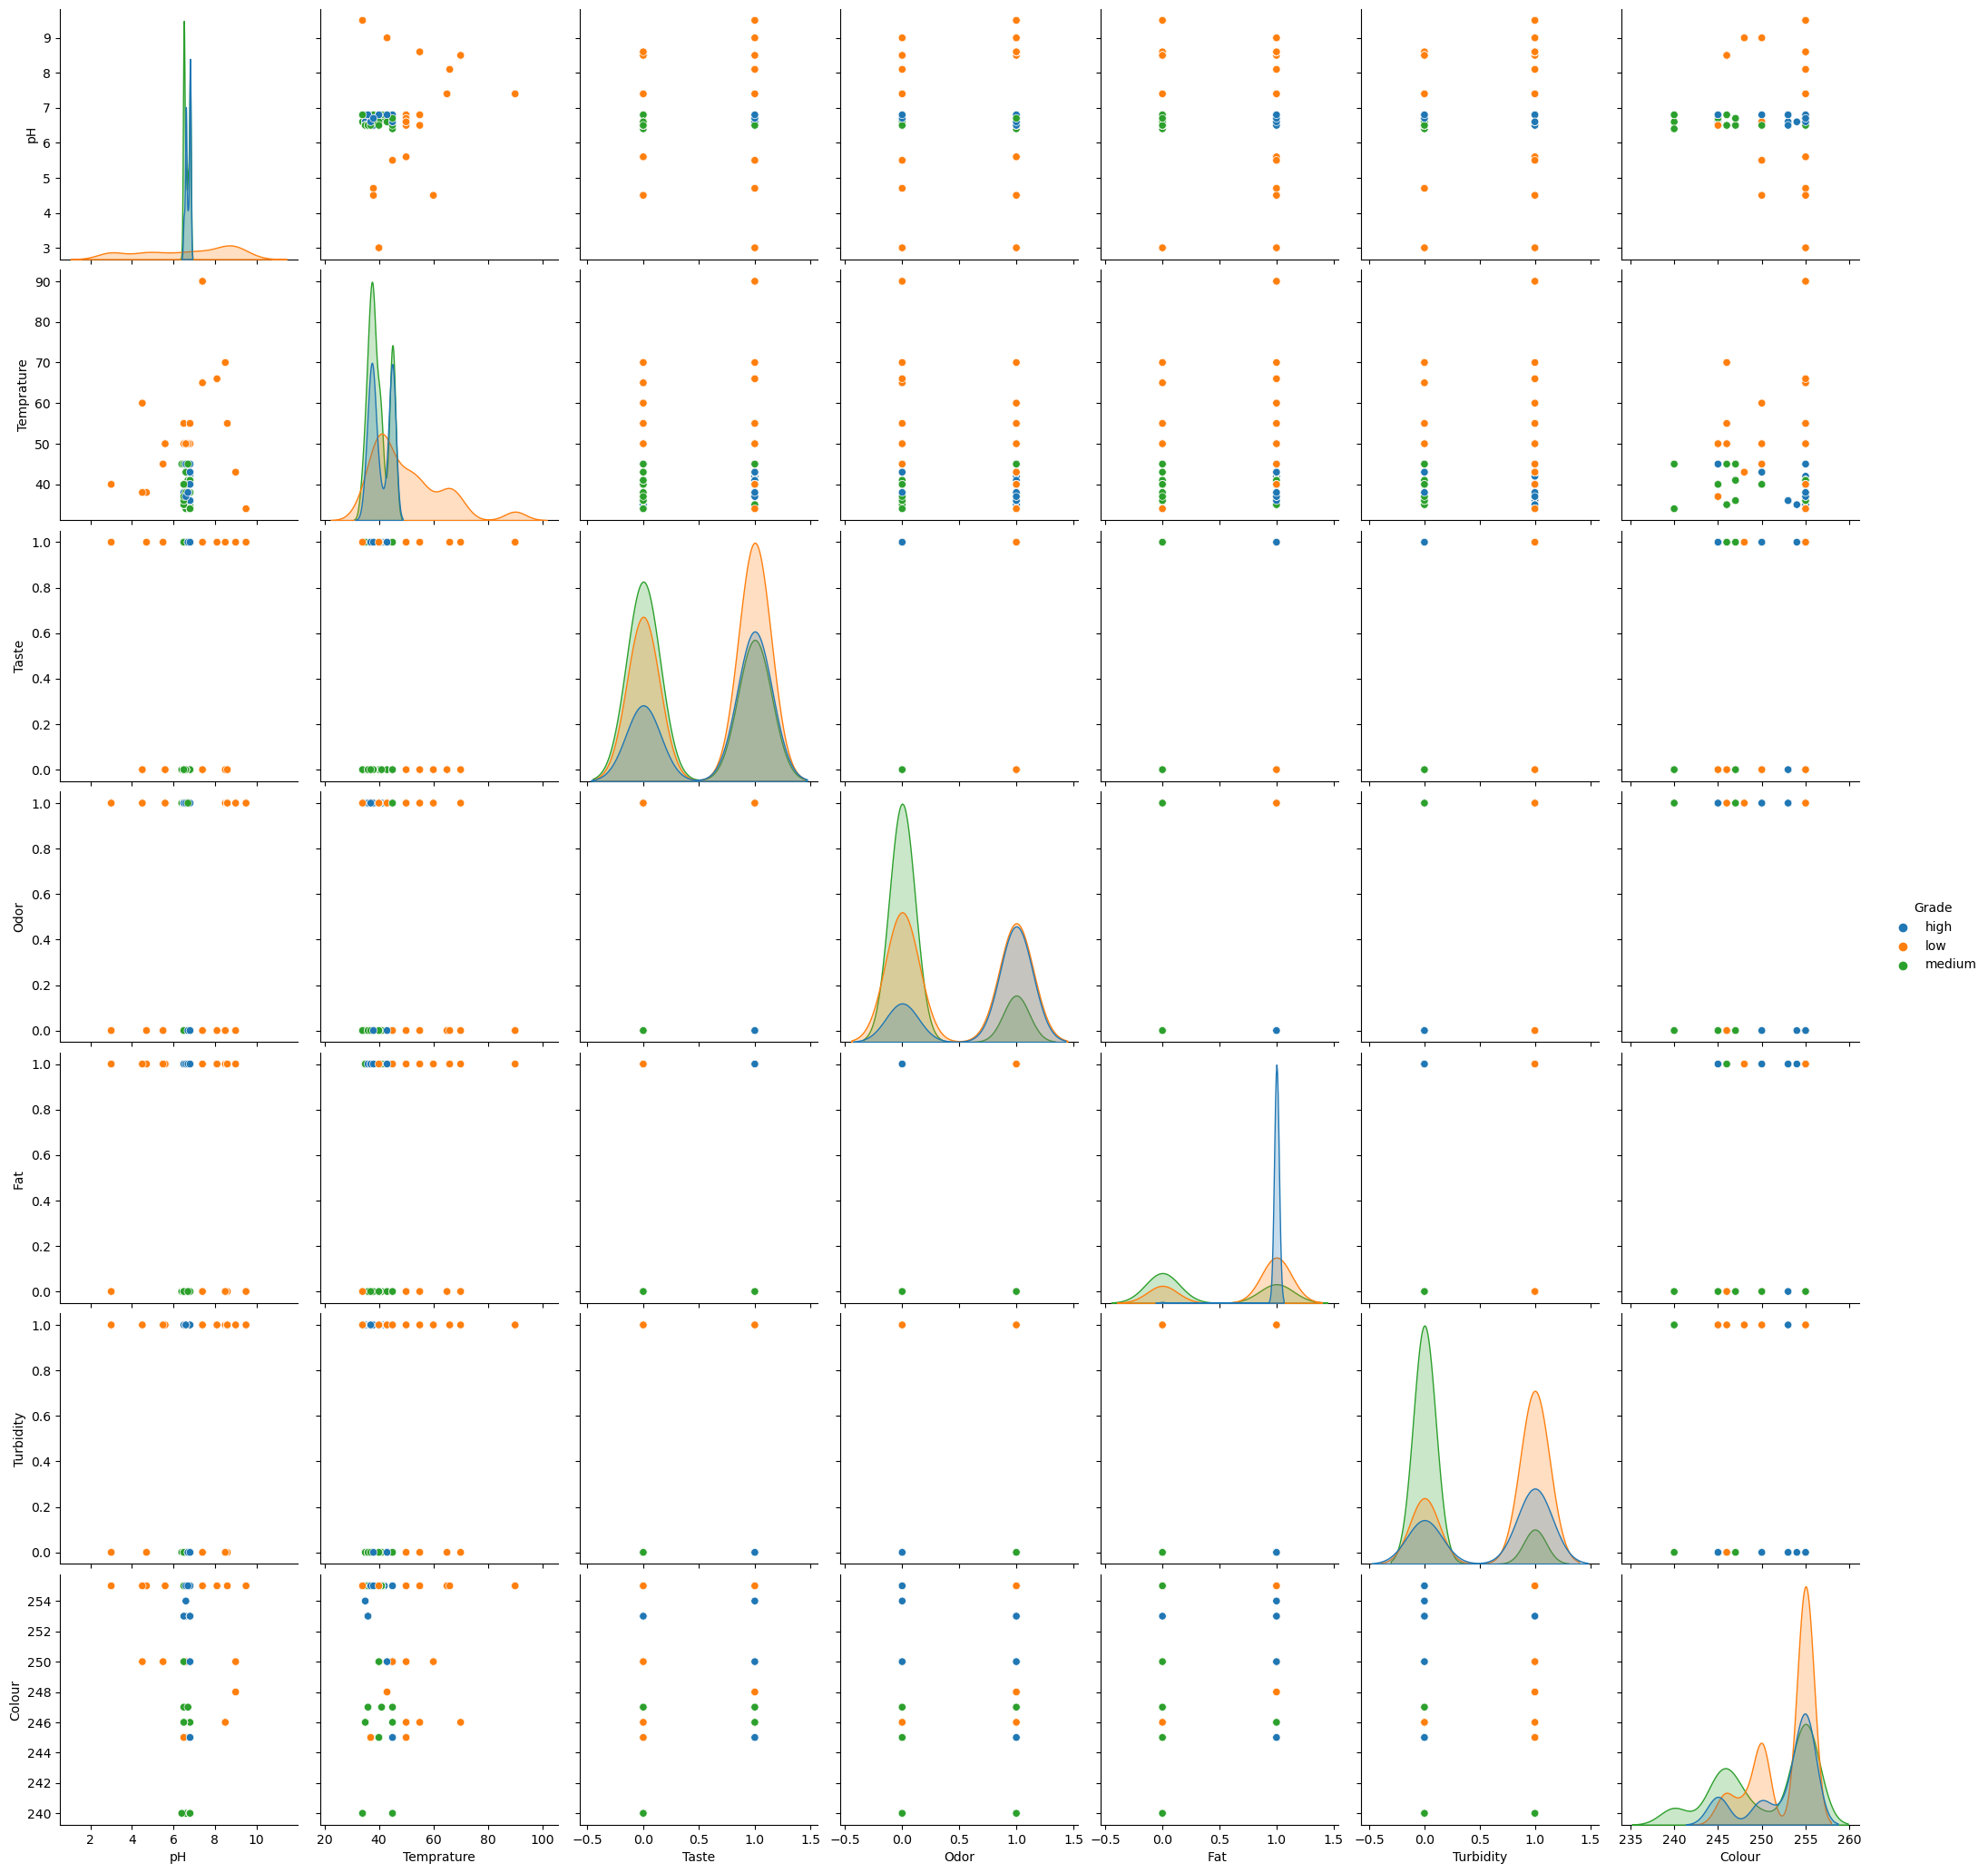

In [30]:
sns.pairplot(df,hue="Grade",height=3)
plt.show()

您上传的图像是一个成对的图表，也被称为散点图矩阵（scatterplot matrix）或者成对关系图（pairplot），通常用于展示数据集中多个变量之间的两两关系。每一行和每一列代表数据集中的一个变量，而图表的交点显示了对应行和列变量之间的关系。

对于非对角线上的图表：
- 每个小图是一个散点图，表示两个变量之间的关系。例如，第一行第二列的小图展示了pH值和Temperature之间的散点关系。
- 不同的颜色代表不同的分类等级（在这个案例中是牛奶的质量等级，如high, medium, low）。

对于对角线上的图表：
- 对角线上的图表是每个变量自身的分布情况，通常使用直方图或密度图表示。在您的图中，对角线上的图表使用了密度图（也称为核密度估计图），显示了每个变量的分布情况。
- 不同的颜色的堆叠表示不同质量等级的密度分布。

如何观看这张图：
1. **观察每个变量的分布**：查看对角线上的图表了解每个变量在不同质量等级下的分布情况。
2. **分析变量间的关系**：查看非对角线的散点图来探索不同变量之间是否存在某种关系或模式。
3. **寻找群组和趋势**：注意是否有颜色群组（即特定质量等级的数据点）在散点图中聚集成明显的区域，这可能表明变量之间的相关性。
4. **识别异常值**：在散点图中寻找远离主要点群的数据点，这些可能是异常值或特殊情况。

这张图为多维数据提供了一个全面的视图，可以帮助您在数据分析和机器学习的上下文中理解数据结构，为特征选择和模型建立提供信息。

您提供的代码段用于对目标变量进行编码，这是机器学习中的一个常见预处理步骤。具体来说，这段代码使用了Scikit-learn的`LabelEncoder`，它能够将类别标签转换为数值形式。以下是各部分的解释：

1. `from sklearn.preprocessing import LabelEncoder`：
   - 这行代码从`sklearn.preprocessing`模块中导入了`LabelEncoder`类。Scikit-learn（简称sklearn）是Python中用于机器学习的一个主要库。

2. `le = LabelEncoder()`：
   - 这行代码创建了一个`LabelEncoder`对象的实例，赋值给变量`le`。这个实例将用于后续的标签编码。

3. `df['Grade'] = le.fit_transform(df['Grade'])`：
   - `fit_transform()`方法是`LabelEncoder`的两个步骤的组合：`fit`方法用于学习数据中的类别，`transform`方法用于将类别转换为整数。
   - 这里，`fit_transform()`方法被应用到DataFrame `df` 中的'Grade'列上，它将类别标签转换为从0到n_classes-1的整数，并将结果保存回`df['Grade']`。
   - 在牛奶质量预测的上下文中，'Grade'列可能包含如'low'、'medium'、'high'这样的类别标签，`LabelEncoder`会将它们转换为整数，例如0、1、2。

4. `df['Grade'].unique()`：
   - `unique()`方法用于获取经过标签编码后的'Grade'列中所有唯一值的数组。这可以验证标签编码的结果，即每个原始文本标签都被分配了一个唯一的整数。

**意义**：
- 在大多数机器学习模型中，特征和目标变量通常需要是数值型的，因为算法通常是基于数学运算的，无法直接处理文本标签。
- 编码目标变量是准备数据以进行机器学习建模的关键步骤之一，确保目标变量能够被模型正确处理。
- 使用整数编码后，您可以将这些整数用作训练模型的目标变量，以预测牛奶的质量等级。

在进行模型训练之前，确保对类别变量进行适当的编码是机器学习工作流程中的一个重要方面。

In [31]:
#Encoding the target variable-

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Grade'] = le.fit_transform(df['Grade'])
df['Grade'].unique()

array([0, 1, 2])

这段代码是在准备机器学习模型的训练数据和测试数据的过程中的一部分，其目的是将数据集分为特征集（通常标记为`X`）和目标变量（通常标记为`y`）。

1. `X= df.drop("Temprature", axis = 1)`：
   - `df.drop()` 是一个Pandas的DataFrame方法，用于移除DataFrame中的指定列或行。
   - `"Temprature"` 是您想要从特征集中移除的列名，可能是因为您打算预测温度或因为温度不是一个特征变量。
   - `axis = 1` 参数指定了您希望在列上进行操作（`axis = 0` 用于行）。
   - 这行代码的结果是一个新的DataFrame `X`，它包含除了"Temprature"列以外的所有数据。

2. `y= df["Temprature"]`：
   - 这行代码创建了一个名为`y`的序列（Series），它只包含"Temprature"列的数据。
   - 在机器学习中，`y` 通常用于表示目标变量或预测变量，即模型训练的目标。

**意义**：
- 在监督学习中，您通常有一个预测目标（`y`），模型的任务是基于一组特征（`X`）来预测这个目标。
- 在这种情况下，您可能正在尝试预测牛奶的温度，因此将"Temprature"列设为目标变量。
- 通过分离出特征集和目标变量，您可以使用这些数据来训练模型，并评估模型在预测温度方面的性能。

在实际应用中，您会将数据进一步分为训练集和测试集，模型在训练集上学习，在测试集上进行评估，以检验模型对新数据的泛化能力。

In [32]:
# Train-Test Data

X= df.drop("Temprature", axis = 1) 
y= df["Temprature"]

这段代码使用了Scikit-learn的`train_test_split`函数，用于将数据集分割成两部分：训练集和测试集。以下是每个部分的详细解释：

### 导入函数
- `from sklearn.model_selection import train_test_split`：
  这行代码从`sklearn.model_selection`模块中导入了`train_test_split`函数。这个函数是Scikit-learn中用于分割数据的标准工具。

### 分割数据集
- `X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.80, random_state = 41)`：
  - `train_test_split`函数接受特征数据`X`和目标数据`y`作为输入，并分割它们为训练集（`X_train`和`y_train`）和测试集（`X_test`和`y_test`）。
  - `train_size = 0.80`参数指定了训练集应包含数据集的80%，剩下的20%则作为测试集。这是确保模型有足够数据进行学习的同时也保留了一部分数据用于测试模型性能。
  - `random_state = 41`是一个随机种子参数，它确保了分割过程的可重复性。指定一个随机种子可以确保每次运行代码时数据分割的方式都是一样的，这对于实验的可复现性是很重要的。

### 函数、定义、意义
- **训练集（Training Set）**：模型用来学习的数据。这部分数据包含了特征和对应的目标值，模型通过这些数据来发现特征和目标值之间的关系。
- **测试集（Test Set）**：用来评估模型性能的数据。这部分数据同样包含了特征和对应的目标值，但是模型在训练阶段是看不到这些数据的。测试集的目标值用于与模型的预测值进行比较，以评估模型对未知数据的预测能力。
- **意义**：正确地分割训练集和测试集对于开发一个能够泛化到新数据上的机器学习模型是至关重要的。没有独立的测试集可能导致过度拟合，即模型学习了训练数据中的随机噪声而非真实的信号。

在牛奶质量预测的上下文中，这意味着您将基于一部分数据（训练集）来训练模型，然后用另一部分数据（测试集）来测试模型预测牛奶质量的能力。这样可以给您一个关于模型在实际应用中表现如何的良好估计。

In [33]:
#Splitting the dataset into Training and Test-

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.80, random_state = 41)

 模型構建

LinearRegression

在您提供的代码段中，您正在使用Scikit-learn的`LinearRegression`类来创建和训练一个线性回归模型，并进行预测。这些步骤在机器学习项目中非常常见，尤其是在处理回归问题时。下面是各部分的详细解释：

### 导入线性回归模型
- `from sklearn.linear_model import LinearRegression`：
  这行代码从Scikit-learn的`linear_model`模块中导入了`LinearRegression`类。这个类实现了一个普通最小二乘线性回归模型。

### 创建线性回归实例
- `lr = LinearRegression()`：
  这行代码创建了`LinearRegression`类的一个实例，并将这个实例赋给变量`lr`。这个实例将用来训练模型。

### 训练模型
- `lr.fit(X_train,y_train)`：
  - `fit()`方法用于训练线性回归模型。您需要提供训练数据`X_train`（特征）和`y_train`（目标变量）作为参数。
  - 在这个过程中，模型会学习如何将特征（`X_train`）和目标变量（`y_train`）关联起来。它尝试找到特征和目标变量之间最佳的线性关系，这个关系通过模型的系数来描述，目的是最小化预测值和实际值之间的差异。

### 进行预测
- `y_pred = lr.predict(X_test)`：
  - `predict()`方法用于在提供的新数据上进行预测。在这里，`X_test`包含了测试集的特征。
  - 这行代码的结果是预测值数组`y_pred`，它包含了线性回归模型基于测试集特征`X_test`所做出的温度预测。

### 函数、定义、意义
- **线性回归（Linear Regression）**：是一种预测连续目标变量的线性方法。它假设特征和目标变量之间存在线性关系，并通过最小化误差的平方和来找到这种关系。
- **意义**：在您的牛奶质量预测问题中，您可能正在使用温度作为目标变量来训练一个模型，以预测基于其他特征的温度。尽管这个问题听起来更像是一个分类问题（质量等级通常是分类的），但如果您在这里使用温度作为连续数值输出，线性回归可能是一种合适的方法。

线性回归是统计学和机器学习中最基础也是最广泛使用的预测模型之一，因为它简单、易于理解，并为解释模型提供了清晰的数学基础。在实际应用中，这个模型可以帮助您理解不同特征对于目标变量（在这个案例中是温度）的影响强度。

In [34]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

在您提供的代码段中，您正在使用Scikit-learn的性能评估工具来计算预测模型的两个关键性能指标：均方误差（Mean Squared Error, MSE）和决定系数（R-squared, R²）。以下是各部分的详细解释：

### 导入性能评估指标
- `from sklearn.metrics import mean_squared_error, r2_score`：
  这行代码从Scikit-learn的`metrics`模块中导入了两个函数：`mean_squared_error`和`r2_score`。这些函数用于评估回归模型的性能。

### 计算均方误差
- `mse = mean_squared_error(y_test, y_pred)`：
  - `mean_squared_error`函数计算实际目标值（`y_test`）和预测值（`y_pred`）之间的MSE。
  - MSE是实际值与预测值差异的平方的平均值，是衡量模型预测精度的常用指标。MSE的值越小，表示模型的预测误差越小，模型性能越好。

### 计算决定系数
- `r2 = r2_score(y_test, y_pred)`：
  - `r2_score`函数计算了R²，它是衡量回归模型预测能力的统计指标。R²的值通常在0到1之间。
  - R²表示模型能够解释的目标变量方差的比例。值为1表示模型能够完美预测所有的数据点，值为0表示模型的预测不比简单使用目标变量的均值来预测更好。

### 输出性能指标
- `print("Mean Squared Error:", mse)`和`print('R2-Score:',r2)`：
  - 这两行代码将打印出计算得到的MSE和R²的值。

### 函数、定义、意义
- **均方误差（MSE）**：是实际值与预测值之差平方的平均数，它能够量化预测误差的大小。MSE提供了一个量化模型性能的方式，使我们能够比较不同模型或模型配置的优劣。
- **决定系数（R²-Score）**：衡量了模型对数据的拟合程度。一个高的R²值通常意味着模型能够很好地捕捉到数据点的变化趋势。

在牛奶质量预测的上下文中，MSE和R²提供了模型性能的重要信息。例如，一个低MSE值和一个高R²值通常表明模型对于数据有很好的预测能力。然而，如果您的目标是分类牛奶的质量等级，而不是预测一个数值（如温度），那么您可能需要使用分类问题的性能评估指标，如准确度（accuracy）、召回率（recall）、精确度（precision）和F1得分（F1 score）。

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print('R2-Score:',r2)

Mean Squared Error: 95.6316242946285
R2-Score: 0.14763496777448915


DecisionTreeReg

这段代码使用了决策树回归器（`DecisionTreeRegressor`）来拟合模型，并评估其在测试集上的性能。以下是各个部分的解释：

### 导入决策树回归器
- `from sklearn.tree import DecisionTreeRegressor`：
  这行代码从Scikit-learn的`tree`模块中导入`DecisionTreeRegressor`类。决策树是一种常用的机器学习算法，用于回归和分类问题。

### 创建决策树回归器实例
- `tree = DecisionTreeRegressor(max_depth=3, random_state=42)`：
  - 创建一个`DecisionTreeRegressor`实例，并设置参数`max_depth=3`，这限制了树的最大深度，防止树过于复杂而导致过拟合。
  - `random_state=42`确保了模型的可复现性，因为决策树在构建过程中有随机性的元素。

### 训练模型
- `tree.fit(X_train, y_train)`：
  - 使用训练数据`X_train`（特征）和`y_train`（目标变量）训练决策树模型。

### 进行预测
- `y_pred = tree.predict(X_test)`：
  - 使用训练好的决策树模型在测试集`X_test`上进行预测，并将预测结果存储在`y_pred`中。

### 计算均方误差
- `mse = mean_squared_error(y_test, y_pred)`：
  - 计算测试集上的预测值`y_pred`与真实值`y_test`之间的均方误差（MSE）。

### 输出均方误差
- `print("Mean Squared Error:", mse)`：
  - 打印出MSE的值。MSE是衡量预测误差大小的指标，理想情况下应该越小越好。

### 计算决定系数
- `r2 = r2_score(y_test, y_pred)`：
  - 计算决定系数（R²），它是衡量模型预测能力的指标，反映了模型对数据变动的解释能力。

### 输出决定系数
- `print('R2-Score:',r2)`：
  - 打印出R²的值。R²值越接近1，说明模型的预测越能准确反映真实数据的变化。

**意义**：
- 决策树回归器是一个非参数化的机器学习算法，可以捕捉数据中的非线性关系。`max_depth`参数帮助控制模型的复杂度，从而防止模型在训练数据上过拟合。
- MSE和R²是回归模型性能评估的标准指标。它们提供了量化模型性能的方式，帮助您了解模型在独立数据集上的表现。
- 在牛奶质量预测的上下文中，这段代码可能用于预测牛奶的某个连续属性（如温度）。不过，如果质量预测是一个分类问题，您可能需要使用`DecisionTreeClassifier`而非`DecisionTreeRegressor`，并使用分类问题的性能评估指标（如准确度、召回率等）。

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3, random_state=42) 
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print('R2-Score:',r2)

Mean Squared Error: 16.55803211456336
R2-Score: 0.8524181965848553


RandomForest

这段代码使用了随机森林回归器（`RandomForestRegressor`），它是一个集成学习方法，用于回归问题。代码的各个部分包含以下内容：

### 导入随机森林回归器
- `from sklearn.ensemble import RandomForestRegressor`：
  这行代码从`sklearn.ensemble`模块中导入`RandomForestRegressor`类。`ensemble`模块包含了实现集成学习算法的类，其中随机森林是一种著名的算法，它通过组合多个决策树来提高预测性能和控制过拟合。

### 创建随机森林回归器实例
- `rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)`：
  - 创建了`RandomForestRegressor`类的一个实例`rf`。
  - `n_estimators=100`指定了集成中决策树的数量；在这个例子中是100棵树。
  - `max_depth=3`限制了决策树的最大深度，以避免过拟合。
  - `random_state=42`设置了随机数生成器的种子，以确保结果的可重现性。

### 训练模型
- `rf.fit(X_train, y_train)`：
  - `fit()`方法用于在训练集上训练随机森林回归器。

### 进行预测
- `y_pred = rf.predict(X_test)`：
  - `predict()`方法用于在测试集上进行预测。

### 计算均方误差
- `mse = mean_squared_error(y_test, y_pred)`：
  - 计算预测值`y_pred`与实际值`y_test`之间的均方误差（MSE）。

### 打印均方误差
- `print("Mean Squared Error:", mse)`：
  - 输出MSE值，MSE是衡量预测误差大小的常用指标。

### 计算决定系数
- `r2 = r2_score(y_test, y_pred)`：
  - 计算决定系数（R²），这是衡量回归模型好坏的一个指标，表示模型对数据变化的解释能力。

### 打印决定系数
- `print('R2-Score:',r2)`：
  - 输出R²的值。R²值越接近1，表示模型的预测能力越好。

**意义**：
- 随机森林回归器结合了多个决策树的预测能力，通常能提供比单一决策树更好的预测准确性和泛化能力。
- MSE和R²为您提供了评估模型性能的重要信息。一个较低的MSE值和较高的R²值通常意味着模型有较好的预测能力。
- 在牛奶质量预测的上下文中，使用随机森林可能是为了预测牛奶的某个连续属性（例如温度）。不过，如果目标是预测牛奶的质量等级类别，那么应该使用`RandomForestClassifier`类和适用于分类问题的评估指标。

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print('R2-Score:',r2)

Mean Squared Error: 13.642695673957737
R2-Score: 0.8784026014035925
